# Ingeniería del dato

# Librerias necesarias

In [1]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import KFold
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

En esta parte del TFG estudiaremos los datos sobre la calidad de vida en Argentina desde 2016. Cargaremos los datos, los limpiaremos y seleccionaremos aquellos que mejor nos informan acerca de la calidad de vida de sus habitantes desde 2016 hasta 2022. Para ello, manipularemos 4 bases de datos: la de los datos correspondientes a 2016, a 2018, a 2020 y a 2022.

# 1. Importamos los datos

Cargar los datos de los CSV en sus correspondientes dataframes:

In [2]:
df2016 = pd.read_excel("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/usu_hogar_T216.xls")  
df2018 = pd.read_excel("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/usu_hogar_t218.xls")  
df2020 = pd.read_excel("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/EPH_usu_hogar_T420.xlsx")  
df2022 = pd.read_excel("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/usu_hogar_T222.xlsx")  


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


Primeros 5 registros de los dataframes para visualizar el aspecto que tienen:

In [3]:
df2016.head(5)
#df2018.head(5)
#df2020.head(5)
#df2022.head(5)

CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  REALIZADA  \
0  TQRMNOQUXHKOKMCDEGKDB00475140  2016          2          1          1   
1  TQRMNOQQYHMMKTCDEGKDB00475009  2016          2          1          1   
2  TQRMNORVUHJMKSCDEGKDB00475326  2016          2          1          1   
3  TQRMNOPQUHMMKTCDEGKDB00475005  2016          2          1          1   
4  TQRMNORVRHJMKSCDEGKDB00475324  2016          2          1          1   

   REGION MAS_500  AGLOMERADO  PONDERA  IV1  ... GDECCFR  PDECCFR  ADECCFR  \
0      43       N          14       77    1  ...               12       12   
1      43       N          14       66    1  ...               07       07   
2      43       N          14       59    1  ...               07       08   
3      43       N          14       66    1  ...               09       10   
4      43       N          14       59    1  ...               03       04   

  PONDIH  VII1_1  VII1_2  VII2_1  VII2_2 VII2_3  VII2_4  
0      0       2       0      98       0      0       0  
1     79       2       0      98       0      0       0  
2     66       1       0       2       0      0       0  
3     81       2       0      98       0      0       0  
4     65       2       0       1       0      0       0  

[5 rows x 88 columns]

Número de registros y variables que tienen los dataframes:

In [4]:
df2016.shape
#df2018.shape
#df2020.shape
#df2022.shape

(18796, 88)

Estadísticos descriptivos básicos de los dataframes:

In [5]:
df2016.describe()
#df2018.describe()
#df2020.describe()
#df2022.describe()

ANO4  TRIMESTRE     NRO_HOGAR  REALIZADA        REGION  \
count  18796.0    18796.0  18796.000000    18796.0  18796.000000   
mean    2016.0        2.0      1.104969        1.0     34.153969   
std        0.0        0.0      1.868657        0.0     16.334441   
min     2016.0        2.0      1.000000        1.0      1.000000   
25%     2016.0        2.0      1.000000        1.0     40.000000   
50%     2016.0        2.0      1.000000        1.0     42.000000   
75%     2016.0        2.0      1.000000        1.0     43.000000   
max     2016.0        2.0     71.000000        1.0     44.000000   

         AGLOMERADO       PONDERA           IV1           IV2           IV3  \
count  18796.000000  18796.000000  18796.000000  18796.000000  18796.000000   
mean      24.113748    466.719940      1.219089      3.064961      1.137582   
std       18.623785    524.710812      0.461891      2.207338      0.375224   
min        2.000000     24.000000      1.000000      1.000000      1.000000   
25%       10.000000    133.000000      1.000000      2.000000      1.000000   
50%       23.000000    237.000000      1.000000      3.000000      1.000000   
75%       33.000000    594.000000      1.000000      4.000000      1.000000   
max       93.000000   6552.000000      6.000000     99.000000      4.000000   

       ...    IX_MAYEQ10            ITF           IPCF        PONDIH  \
count  ...  18796.000000   18796.000000   18796.000000  18796.000000   
mean   ...      2.706533   12710.844648    5088.331225    466.716110   
std    ...      1.464618   14691.192613    6315.800800    709.255575   
min    ...      1.000000       0.000000       0.000000      0.000000   
25%    ...      2.000000    3000.000000    1000.000000     86.000000   
50%    ...      2.000000   10000.000000    3750.000000    198.000000   
75%    ...      4.000000   18000.000000    7000.000000    472.000000   
max    ...     15.000000  718000.000000  239333.330000   8913.000000   

             VII1_1        VII1_2        VII2_1        VII2_2        VII2_3  \
count  18796.000000  18796.000000  18796.000000  18796.000000  18796.000000   
mean       6.317142      0.450415     68.829379      0.373963      0.085763   
std       20.745756      2.433721     43.975169      3.250837      1.166613   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        1.000000      0.000000      3.000000      0.000000      0.000000   
50%        2.000000      0.000000     98.000000      0.000000      0.000000   
75%        2.000000      0.000000     98.000000      0.000000      0.000000   
max       99.000000     97.000000     99.000000     98.000000     96.000000   

             VII2_4  
count  18796.000000  
mean       0.004256  
std        0.150137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        6.000000  

[8 rows x 69 columns]

# 3. Revisamos los tipos de datos de cada variable

In [6]:
df2016.dtypes
#df2018.dtypes
#df2020.dtypes
#df2022.dtypes

CODUSU       object
ANO4          int64
TRIMESTRE     int64
NRO_HOGAR     int64
REALIZADA     int64
              ...  
VII1_2        int64
VII2_1        int64
VII2_2        int64
VII2_3        int64
VII2_4        int64
Length: 88, dtype: object

# 4. Eliminamos variables

A continuación, vamos a proceder a la eliminación de variables de los dataframes que no nos vayan a aportar información en el análisis.

Únicamente nos vamos a quedar con las siguientes variables:

- IV1: Tipo de casa.
- IV2: Número de habitaciones.
- IV6: Disponibilidad de agua.
- IV8: Dispone de cuarto de baño o no.
- IV9: Ubicación del depósito de agua de la vivienda.
- IV12_1: Vertedero cercano a la vivienda.
- II2: Total dormitorios.
- II4_1: Dispone de cocina o no.
- II4_3: Dispone de garaje o no.
- V1: ¿En los últimos meses las personas del hogar han vivido de lo que ganan en el trabajo?
- V6: ¿En los últimos meses las personas del hogar han vivido con mercaderías, ropa, alimentos, gobierno, iglesias, escuelas, etc.?
- ITF: Renta familiar total.
- IPCF: Renta total per cápita familiar.
- AGLOMERADO: Código de aglomerado (cantidad máxima de personas permitidas en una vivienda).

In [7]:
#Nos quedamos con las variables anteriores
var2016 = df2016[['IV1', 'IV2','IV6','IV8', 'IV9','IV12_1', 'II2','II4_1', 'II4_3','V1', 'V6', 'ITF', 'IPCF','AGLOMERADO']]
var2018 = df2018[['IV1', 'IV2','IV6','IV8', 'IV9','IV12_1', 'II2','II4_1', 'II4_3','V1', 'V6', 'ITF', 'IPCF','AGLOMERADO']]
var2020 = df2020[['IV1', 'IV2','IV6','IV8', 'IV9','IV12_1', 'II2','II4_1', 'II4_3','V1', 'V6', 'ITF', 'IPCF','AGLOMERADO']]
var2022 = df2022[['IV1', 'IV2','IV6','IV8', 'IV9','IV12_1', 'II2','II4_1', 'II4_3','V1', 'V6', 'ITF', 'IPCF','AGLOMERADO']]


# 5. Renombramos las variables
Vamos a ponerle un nombre a las variables que nos resulte más descriptivo:

In [8]:
df2016 = var2016.rename(columns={"IV1": "TIPO_CASA", "IV2": "NUM_HAB", "IV6": "DISP_AGUA", "IV8": "DISP_BANIO","IV9": "UBI_AGUA", "IV12_1": "VERTEDERO", "II2": "TOTAL_DORMIT", "II4_1": "DISP_COCINA", "II4_3": "DISP_GARAJE", "V1": "VIVIDO_TRABAJ", "V6": "VIVIDO_CON_EXTRAS", "ITF": "RENTA_TOTAL", "IPCF": "RENTA_PER_CAP"})
df2018 = var2018.rename(columns={"IV1": "TIPO_CASA", "IV2": "NUM_HAB", "IV6": "DISP_AGUA", "IV8": "DISP_BANIO","IV9": "UBI_AGUA", "IV12_1": "VERTEDERO", "II2": "TOTAL_DORMIT", "II4_1": "DISP_COCINA", "II4_3": "DISP_GARAJE", "V1": "VIVIDO_TRABAJ", "V6": "VIVIDO_CON_EXTRAS", "ITF": "RENTA_TOTAL", "IPCF": "RENTA_PER_CAP"})
df2020 = var2020.rename(columns={"IV1": "TIPO_CASA", "IV2": "NUM_HAB", "IV6": "DISP_AGUA", "IV8": "DISP_BANIO","IV9": "UBI_AGUA", "IV12_1": "VERTEDERO", "II2": "TOTAL_DORMIT", "II4_1": "DISP_COCINA", "II4_3": "DISP_GARAJE", "V1": "VIVIDO_TRABAJ", "V6": "VIVIDO_CON_EXTRAS", "ITF": "RENTA_TOTAL", "IPCF": "RENTA_PER_CAP"})
df2022 = var2022.rename(columns={"IV1": "TIPO_CASA", "IV2": "NUM_HAB", "IV6": "DISP_AGUA", "IV8": "DISP_BANIO","IV9": "UBI_AGUA", "IV12_1": "VERTEDERO", "II2": "TOTAL_DORMIT", "II4_1": "DISP_COCINA", "II4_3": "DISP_GARAJE", "V1": "VIVIDO_TRABAJ", "V6": "VIVIDO_CON_EXTRAS", "ITF": "RENTA_TOTAL", "IPCF": "RENTA_PER_CAP"})
#Veamos los dataframes actualizados:
df2016.head(5)
#df2018.head(5)
#df2020.head(5)
#df2022.head(5)

TIPO_CASA  NUM_HAB  DISP_AGUA  DISP_BANIO  UBI_AGUA  VERTEDERO  \
0          1        3          1           1         1          2   
1          1        3          1           1         1          2   
2          1        2          1           1         1          2   
3          1        4          1           1         1          2   
4          1        3          1           1         1          2   

   TOTAL_DORMIT  DISP_COCINA  DISP_GARAJE  VIVIDO_TRABAJ  VIVIDO_CON_EXTRAS  \
0             2            1            1              1                  2   
1             2            1            1              1                  2   
2             1            1            2              2                  2   
3             1            1            1              1                  2   
4             1            1            1              1                  2   

   RENTA_TOTAL  RENTA_PER_CAP  AGLOMERADO  
0            0           0.00          14  
1        19000        6333.33          14  
2        13800        6900.00          14  
3        25000       12500.00          14  
4         6000        3000.00          14

# 6. Limpiamos las bases de datos:

In [9]:
#Comprobamos que no haya variables sin valor (todo 0s)
#df2016.describe()
#df2018.describe()
#df2020.describe()
df2022.describe()

TIPO_CASA       NUM_HAB     DISP_AGUA    DISP_BANIO      UBI_AGUA  \
count  17367.000000  17367.000000  17367.000000  17367.000000  17367.000000   
mean       1.242990      3.115219      1.018829      1.001900      1.026832   
std        0.509191      3.228455      0.145342      0.043551      0.173291   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%        1.000000      2.000000      1.000000      1.000000      1.000000   
50%        1.000000      3.000000      1.000000      1.000000      1.000000   
75%        1.000000      4.000000      1.000000      1.000000      1.000000   
max        6.000000     99.000000      3.000000      2.000000      3.000000   

          VERTEDERO  TOTAL_DORMIT   DISP_COCINA   DISP_GARAJE  VIVIDO_TRABAJ  \
count  17367.000000  17367.000000  17367.000000  17367.000000   17367.000000   
mean       1.949675      1.859446      1.102493      1.673346       1.213105   
std        0.218622      0.858660      0.305951      0.470719       0.424970   
min        1.000000      0.000000      0.000000      0.000000       1.000000   
25%        2.000000      1.000000      1.000000      1.000000       1.000000   
50%        2.000000      2.000000      1.000000      2.000000       1.000000   
75%        2.000000      2.000000      1.000000      2.000000       1.000000   
max        2.000000      7.000000      2.000000      2.000000       9.000000   

       VIVIDO_CON_EXTRAS   RENTA_TOTAL  RENTA_PER_CAP    AGLOMERADO  
count       17367.000000  1.736700e+04   1.736700e+04  17367.000000  
mean            1.958888  8.765288e+04   3.735417e+04     23.548512  
std             0.228743  9.207255e+04   4.380282e+04     18.959632  
min             1.000000  0.000000e+00   0.000000e+00      2.000000  
25%             2.000000  2.700000e+04   1.000000e+04     10.000000  
50%             2.000000  7.000000e+04   2.850000e+04     22.000000  
75%             2.000000  1.208000e+05   5.000000e+04     32.000000  
max             9.000000  2.328000e+06   1.164000e+06     93.000000

In [10]:
#Comprobamos que no haya valores nulos
var2016_null = df2016.isnull().sum()
var2018_null = df2018.isnull().sum()
var2020_null = df2020.isnull().sum()
var2022_null = df2022.isnull().sum()
print(pd.concat([var2016_null, var2018_null, var2020_null, var2022_null], axis=1, keys=['df2016', 'df2018', 'df2020', 'df2022']))

                   df2016  df2018  df2020  df2022
TIPO_CASA               0       0       0       0
NUM_HAB                 0       0       0       0
DISP_AGUA               0       0       0       0
DISP_BANIO              0       0       0       0
UBI_AGUA                0       0       0       0
VERTEDERO               0       0       0       0
TOTAL_DORMIT            0       0       0       0
DISP_COCINA             0       0       0       0
DISP_GARAJE             0       0       0       0
VIVIDO_TRABAJ           0       0       0       0
VIVIDO_CON_EXTRAS       0       0       0       0
RENTA_TOTAL             0       0       0       0
RENTA_PER_CAP           0       0       0       0
AGLOMERADO              0       0       0       0


In [11]:
#Comprobamos el tipo de dato para su posterior manipulación
df2016.dtypes
#df2018.dtypes
#df2020.dtypes
#df2022.dtypes

TIPO_CASA              int64
NUM_HAB                int64
DISP_AGUA              int64
DISP_BANIO             int64
UBI_AGUA               int64
VERTEDERO              int64
TOTAL_DORMIT           int64
DISP_COCINA            int64
DISP_GARAJE            int64
VIVIDO_TRABAJ          int64
VIVIDO_CON_EXTRAS      int64
RENTA_TOTAL            int64
RENTA_PER_CAP        float64
AGLOMERADO             int64
dtype: object

# 7. Exploración de los datos

A continuación, estudiaremos la correlación de los datos de cada año, eliminando aquellas variables que tengan una correlación >=0.85.

## 2016

                   TIPO_CASA   NUM_HAB  DISP_AGUA  DISP_BANIO  UBI_AGUA  \
TIPO_CASA           1.000000 -0.117548   0.024363    0.023187  0.012617   
NUM_HAB            -0.117548  1.000000  -0.074214   -0.039320 -0.055631   
DISP_AGUA           0.024363 -0.074214   1.000000    0.173938  0.482808   
DISP_BANIO          0.023187 -0.039320   0.173938    1.000000 -0.276669   
UBI_AGUA            0.012617 -0.055631   0.482808   -0.276669  1.000000   
VERTEDERO           0.036475 -0.000533  -0.065080   -0.002179 -0.067870   
TOTAL_DORMIT       -0.188992  0.290701  -0.060936   -0.042867 -0.032801   
DISP_COCINA         0.053020 -0.050582   0.170448    0.066086  0.123588   
DISP_GARAJE         0.200586 -0.135179   0.092728    0.031689  0.085243   
VIVIDO_TRABAJ       0.052318 -0.019772  -0.017855   -0.007101 -0.024818   
VIVIDO_CON_EXTRAS   0.010332  0.004466  -0.044013   -0.012949 -0.043648   
RENTA_TOTAL        -0.012179  0.084214  -0.050240   -0.021974 -0.046733   
RENTA_PER_CAP       0.089

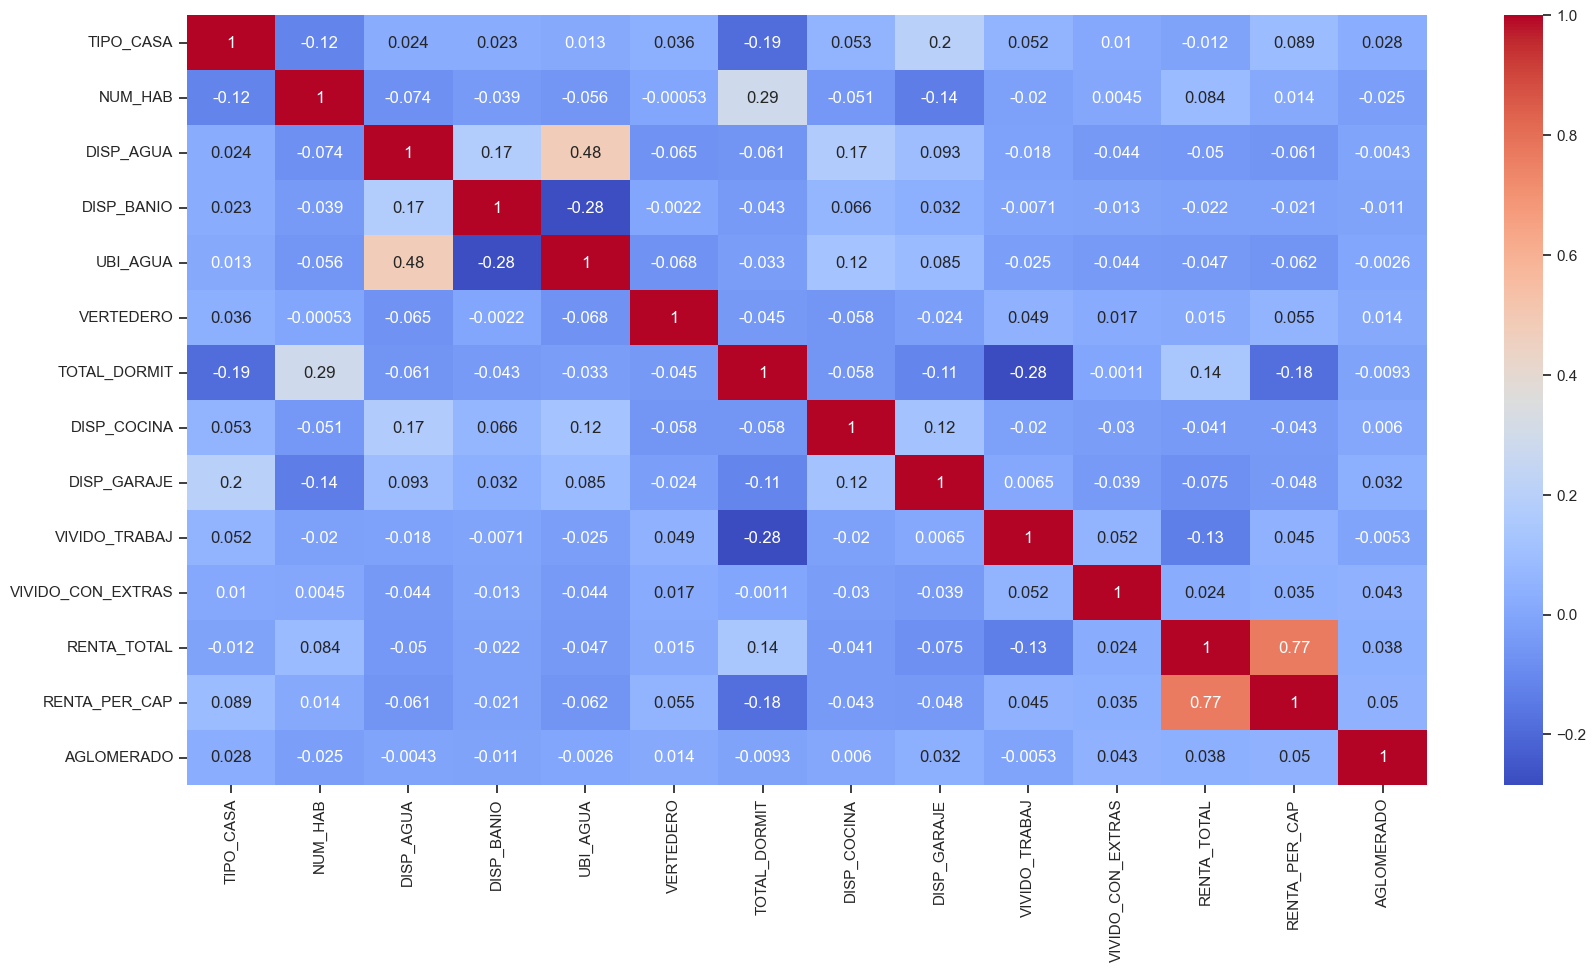

In [12]:
print(df2016.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2016.corr(), annot=True, cmap='coolwarm')
plt.show()

## 2018

                   TIPO_CASA   NUM_HAB  DISP_AGUA  DISP_BANIO  UBI_AGUA  \
TIPO_CASA           1.000000 -0.128435   0.051899    0.054232  0.026365   
NUM_HAB            -0.128435  1.000000  -0.073809   -0.038588 -0.052524   
DISP_AGUA           0.051899 -0.073809   1.000000    0.211272  0.431846   
DISP_BANIO          0.054232 -0.038588   0.211272    1.000000 -0.292914   
UBI_AGUA            0.026365 -0.052524   0.431846   -0.292914  1.000000   
VERTEDERO           0.046134  0.001079  -0.084419   -0.006011 -0.060011   
TOTAL_DORMIT       -0.204276  0.295506  -0.069354   -0.034726 -0.056115   
DISP_COCINA         0.050370 -0.054415   0.172630    0.079236  0.137310   
DISP_GARAJE         0.204190 -0.139287   0.090470    0.033667  0.093988   
VIVIDO_TRABAJ       0.042811 -0.038709  -0.008395   -0.001518 -0.022718   
VIVIDO_CON_EXTRAS   0.029023  0.011556  -0.028848   -0.016204 -0.033875   
RENTA_TOTAL        -0.018597  0.106599  -0.062704   -0.030656 -0.050195   
RENTA_PER_CAP       0.095

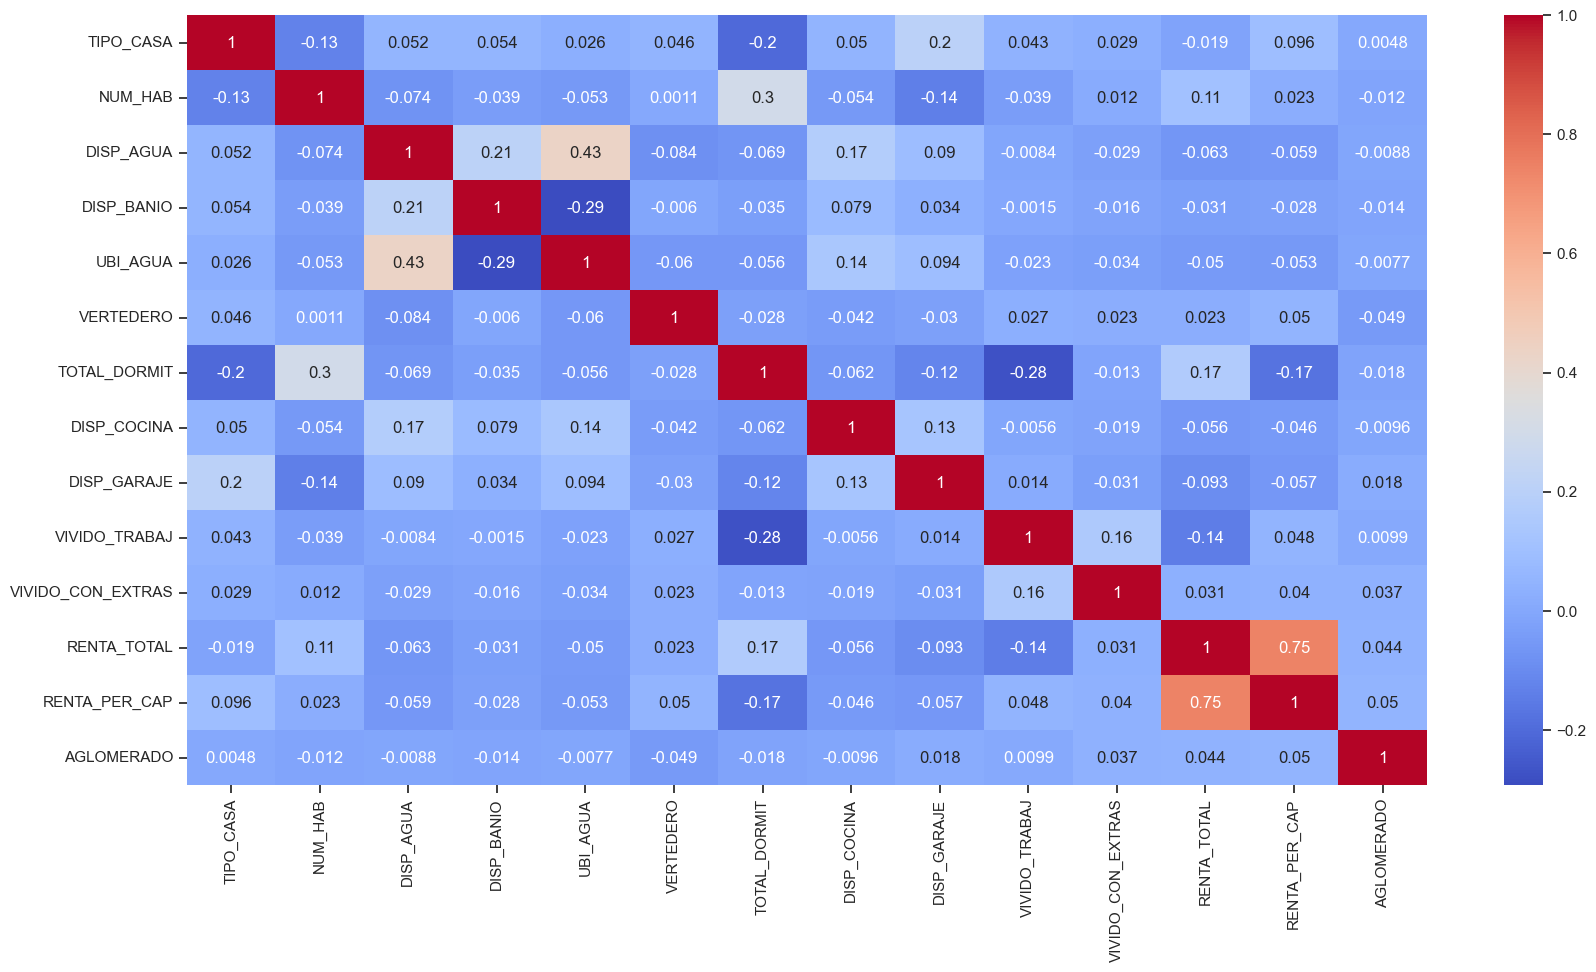

In [13]:
print(df2018.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2018.corr(), annot=True, cmap='coolwarm')
plt.show()

## 2020

                   TIPO_CASA   NUM_HAB  DISP_AGUA  DISP_BANIO  UBI_AGUA  \
TIPO_CASA           1.000000 -0.114841   0.071582    0.039283  0.047960   
NUM_HAB            -0.114841  1.000000  -0.067945    0.016354 -0.066100   
DISP_AGUA           0.071582 -0.067945   1.000000    0.201502  0.387896   
DISP_BANIO          0.039283  0.016354   0.201502    1.000000 -0.299087   
UBI_AGUA            0.047960 -0.066100   0.387896   -0.299087  1.000000   
VERTEDERO           0.053781 -0.029955  -0.054535   -0.002917 -0.079675   
TOTAL_DORMIT       -0.189978  0.294658  -0.061757   -0.047631 -0.048930   
DISP_COCINA         0.044478 -0.055615   0.110504    0.068618  0.083329   
DISP_GARAJE         0.187096 -0.131061   0.081525    0.037050  0.074283   
VIVIDO_TRABAJ       0.027215 -0.032251  -0.007457   -0.015990 -0.010056   
VIVIDO_CON_EXTRAS   0.001057  0.031214  -0.090095   -0.016186 -0.074583   
RENTA_TOTAL        -0.012055  0.106387  -0.055732   -0.022024 -0.047671   
RENTA_PER_CAP       0.089

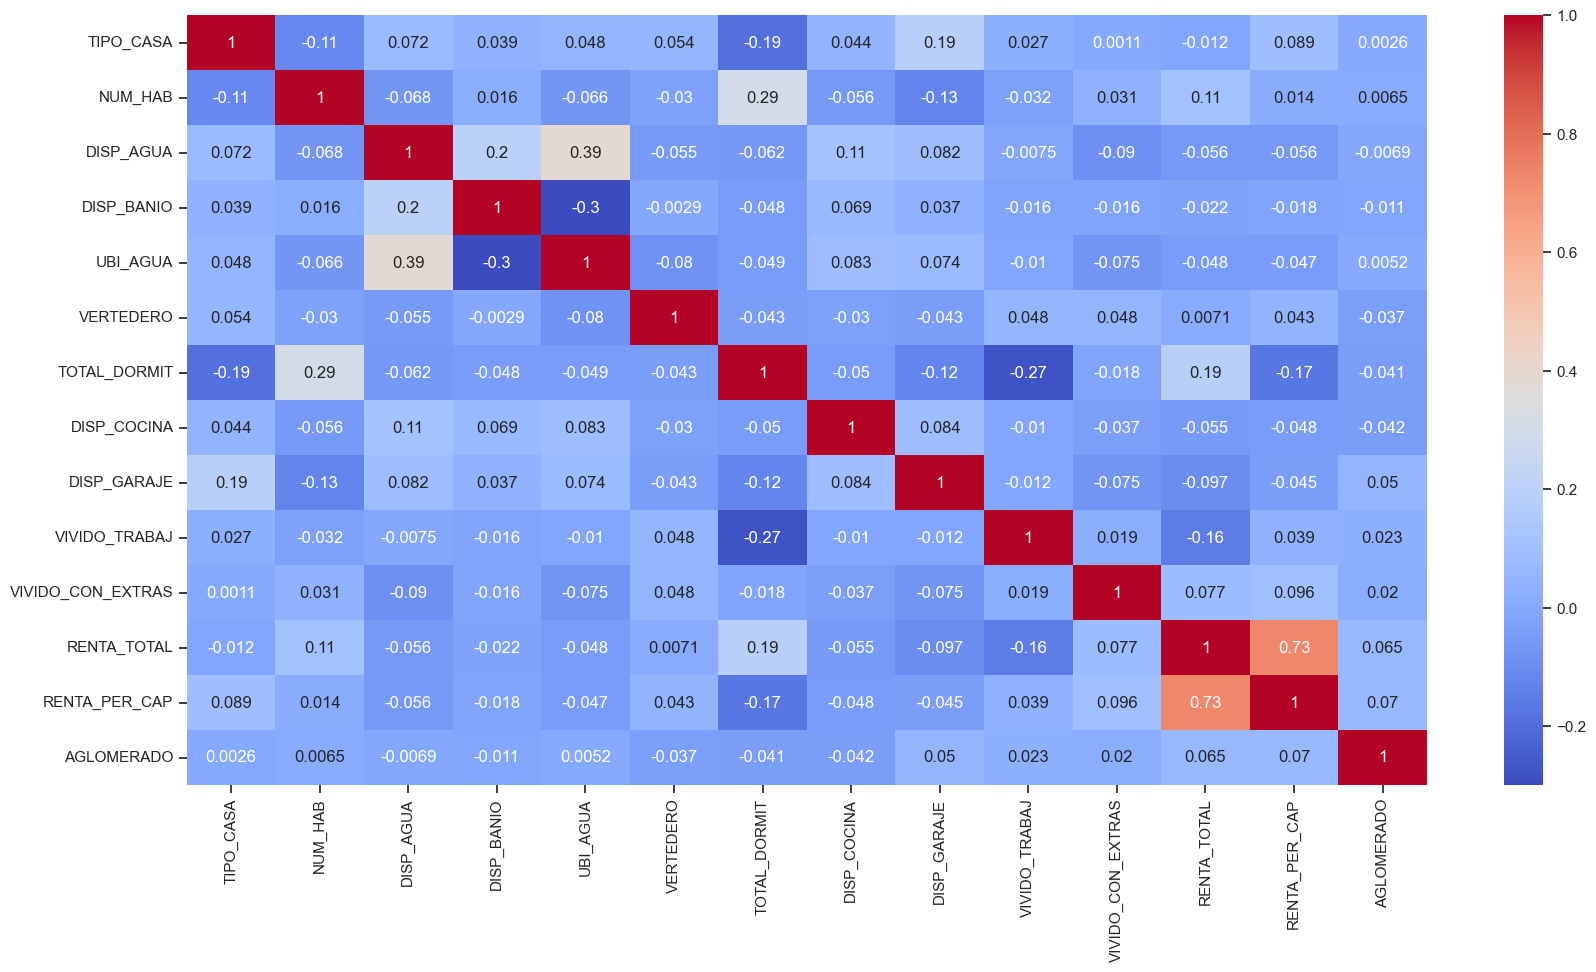

In [14]:
print(df2020.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2020.corr(), annot=True, cmap='coolwarm')
plt.show()

## 2022

                   TIPO_CASA   NUM_HAB  DISP_AGUA  DISP_BANIO  UBI_AGUA  \
TIPO_CASA           1.000000 -0.082500   0.064225    0.031112  0.039004   
NUM_HAB            -0.082500  1.000000  -0.049907   -0.025311 -0.019833   
DISP_AGUA           0.064225 -0.049907   1.000000    0.212684  0.386902   
DISP_BANIO          0.031112 -0.025311   0.212684    1.000000 -0.258550   
UBI_AGUA            0.039004 -0.019833   0.386902   -0.258550  1.000000   
VERTEDERO           0.033299 -0.004430  -0.077099   -0.026244 -0.055552   
TOTAL_DORMIT       -0.204386  0.220191  -0.063231   -0.039054 -0.036572   
DISP_COCINA         0.064493 -0.022158   0.106815    0.058852  0.098008   
DISP_GARAJE         0.201442 -0.097888   0.078122    0.030279  0.081338   
VIVIDO_TRABAJ       0.014289 -0.028222  -0.014623   -0.006324 -0.015879   
VIVIDO_CON_EXTRAS   0.024964  0.025831  -0.061585   -0.015279 -0.043351   
RENTA_TOTAL        -0.019010  0.080980  -0.045003   -0.019652 -0.035551   
RENTA_PER_CAP       0.097

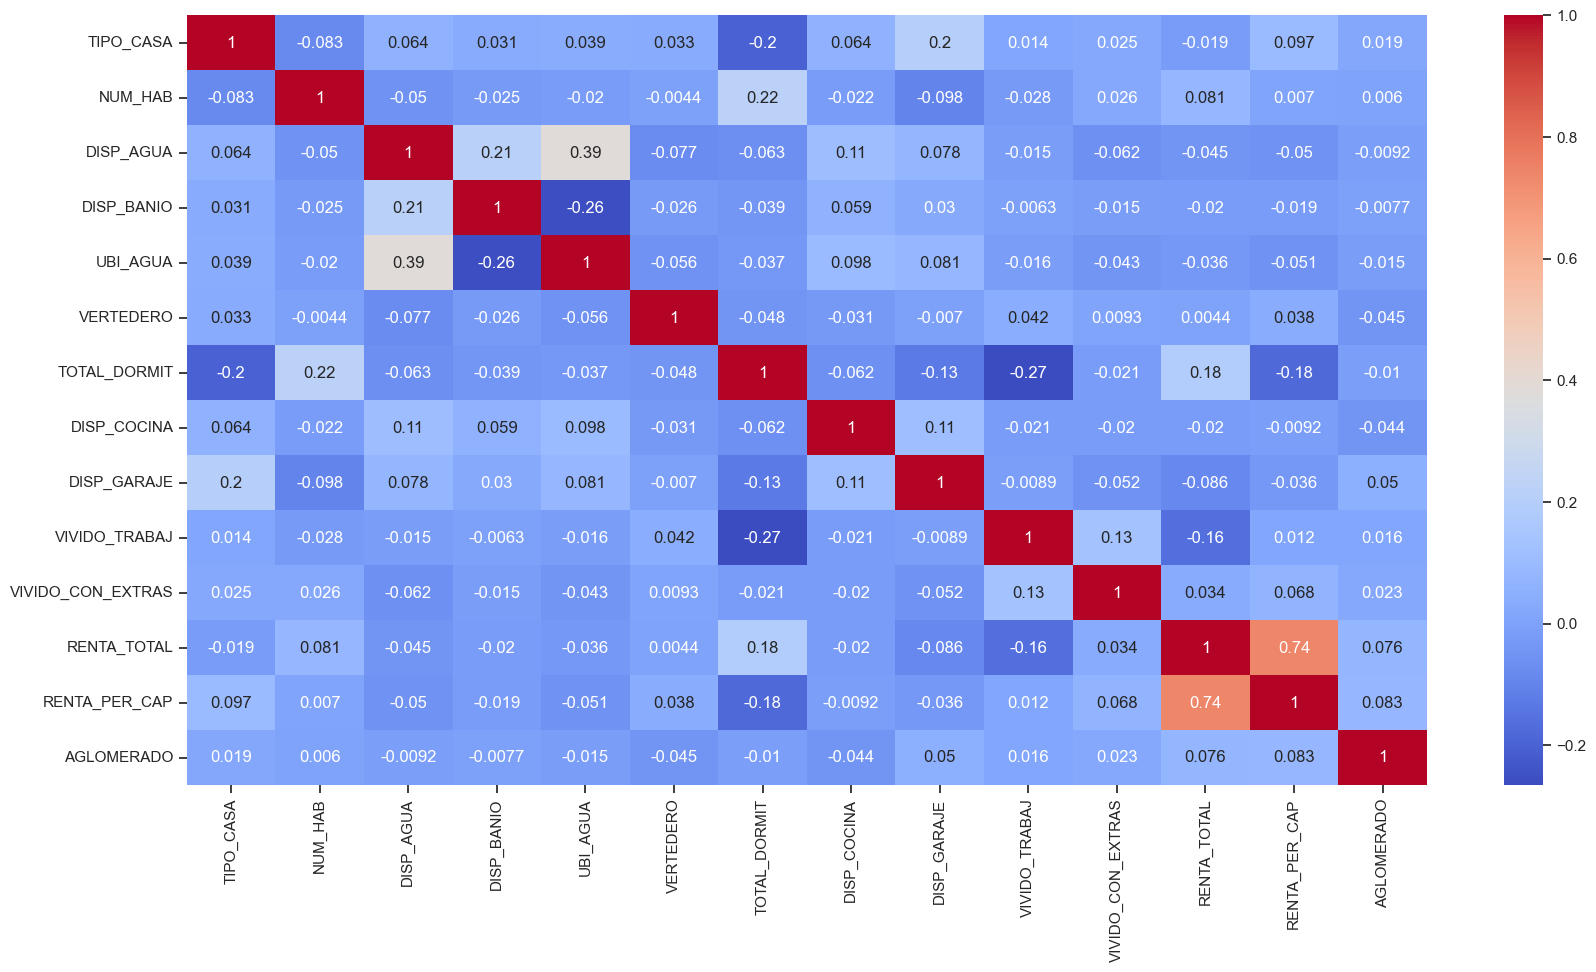

In [15]:
print(df2022.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2022.corr(), annot=True, cmap='coolwarm')
plt.show()

Ahora vamos a estudiar los outliers en los 4 datasets y los vamos a eliminar:

## 2016

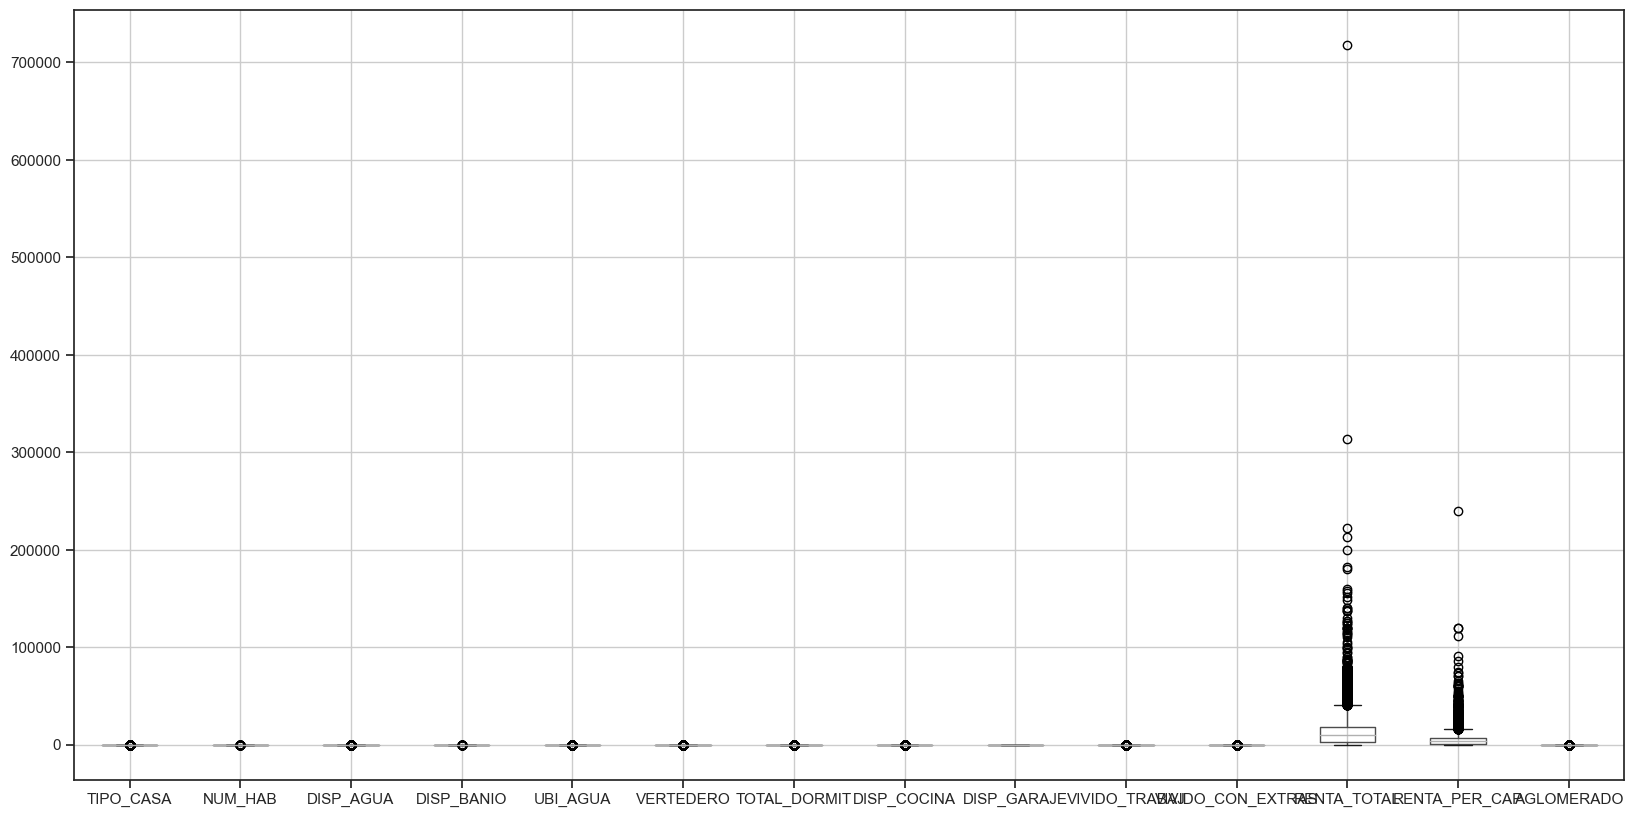

In [16]:
df2016.boxplot(figsize=(20,10))
plt.show()

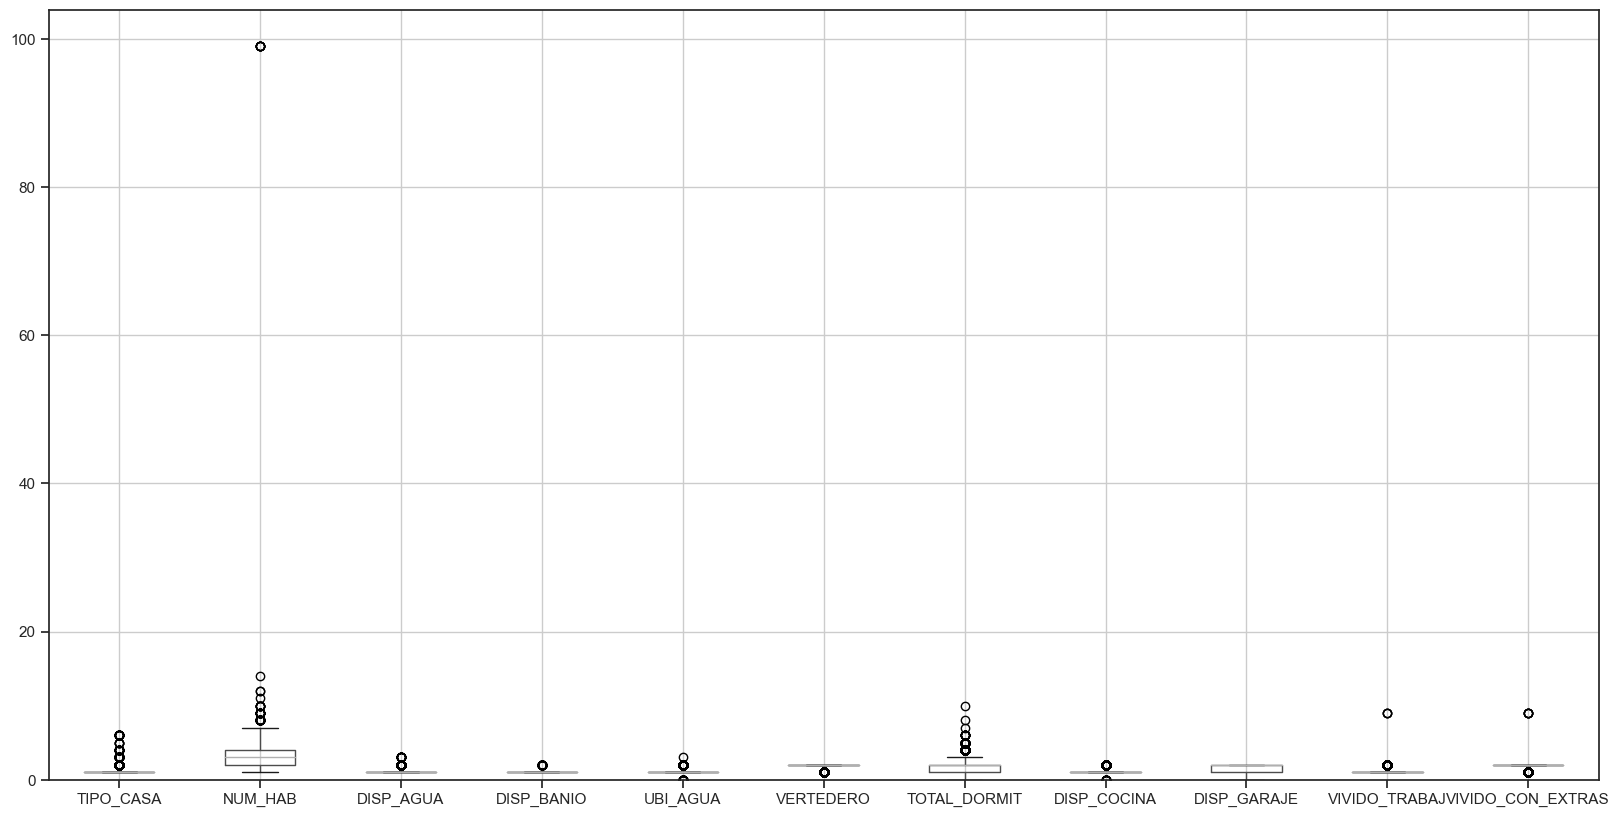

In [17]:
box_16=df2016.drop(['RENTA_TOTAL','RENTA_PER_CAP', 'AGLOMERADO'],axis=1)
box_16.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

## 2018

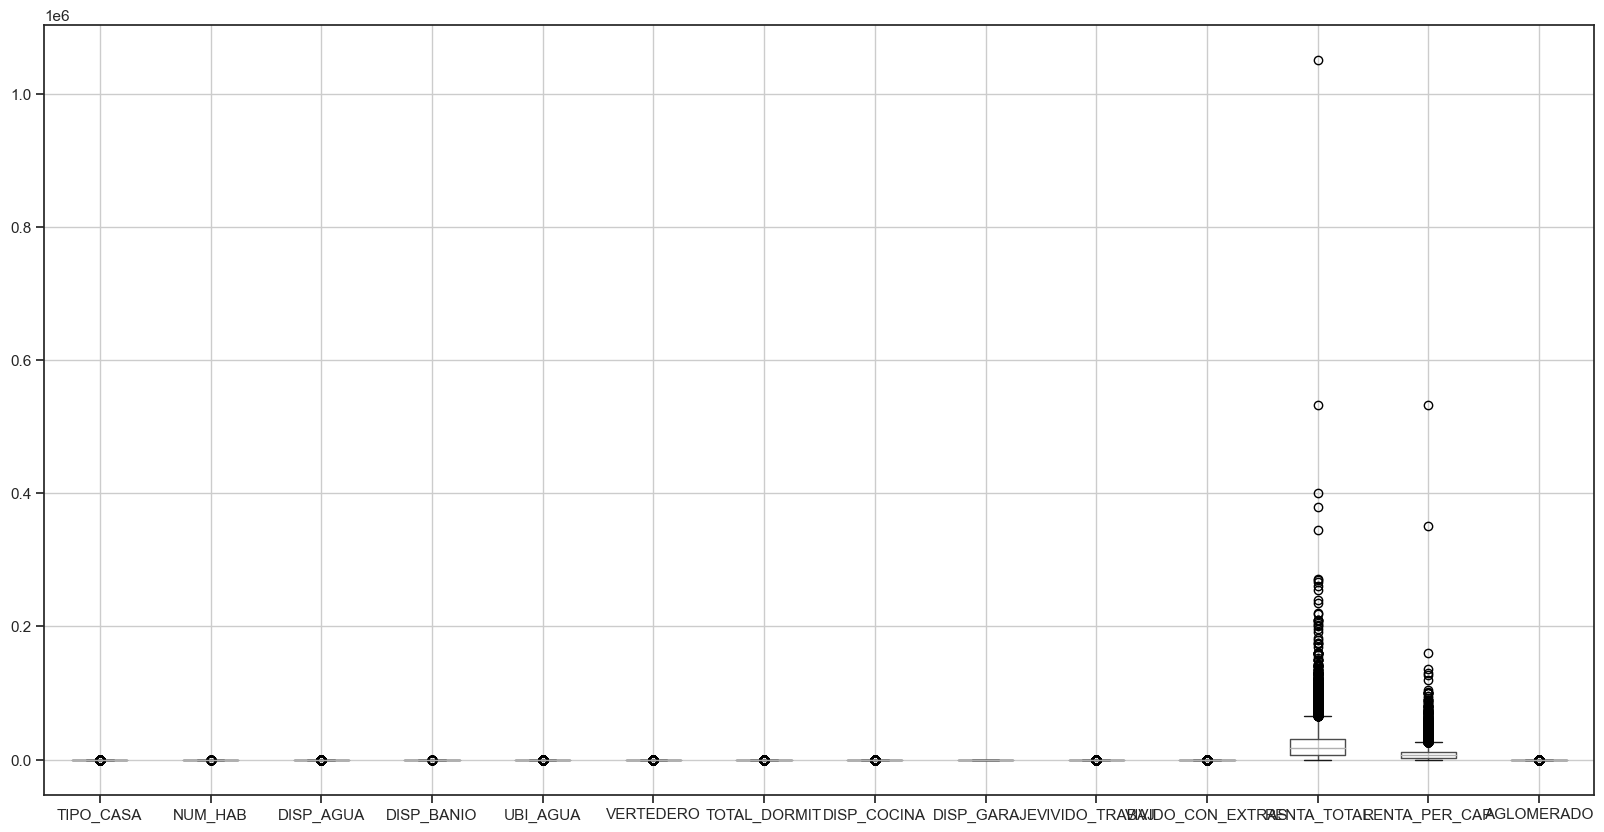

In [18]:
df2018.boxplot(figsize=(20,10))
plt.show()

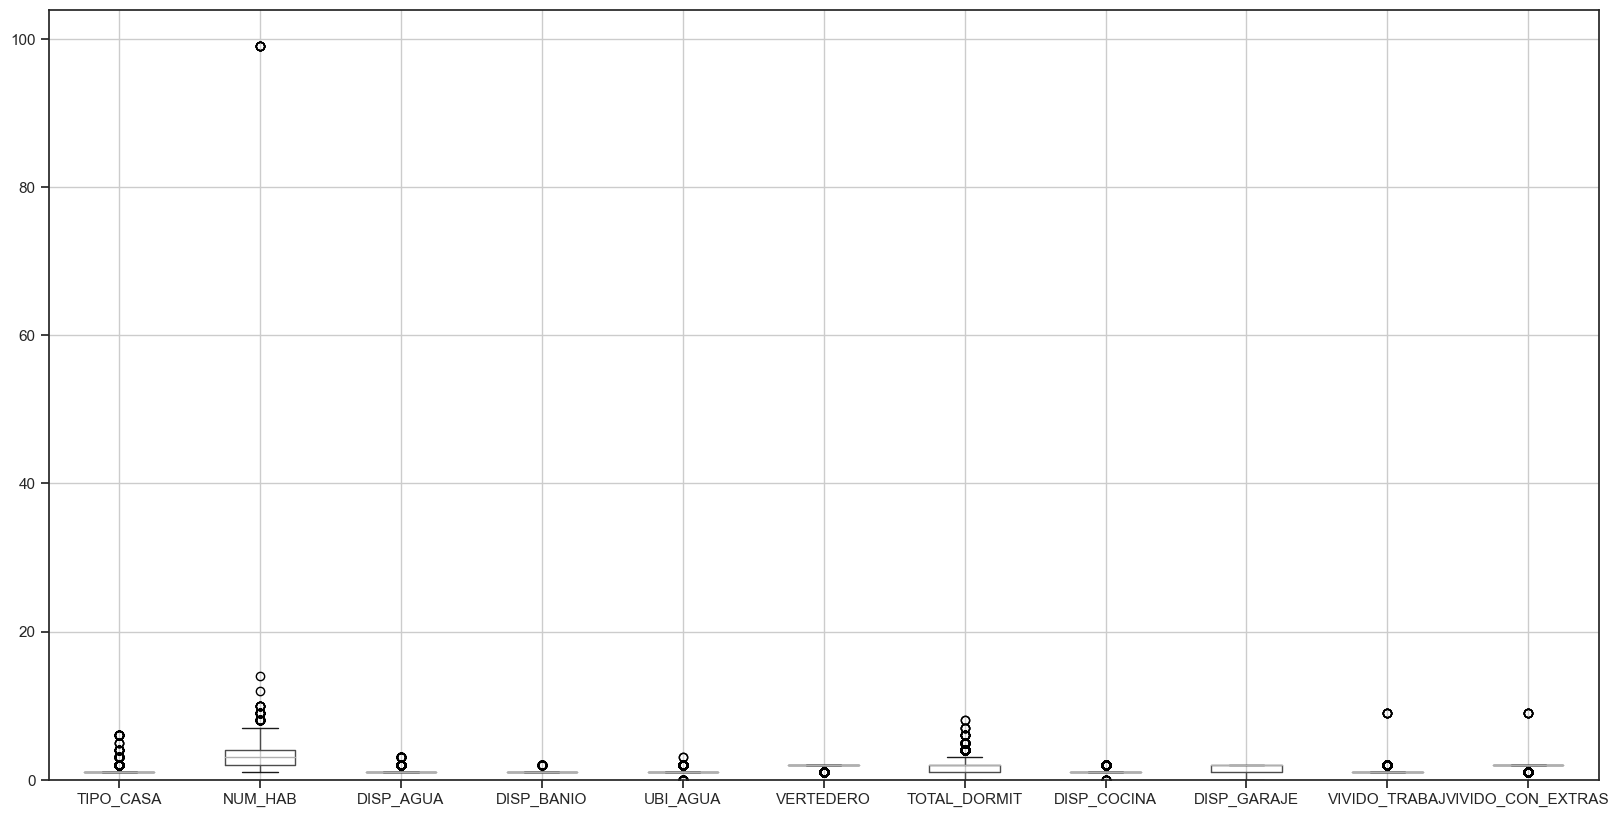

In [19]:
box_18=df2018.drop(['RENTA_TOTAL','RENTA_PER_CAP', 'AGLOMERADO'],axis=1)
box_18.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

## 2020

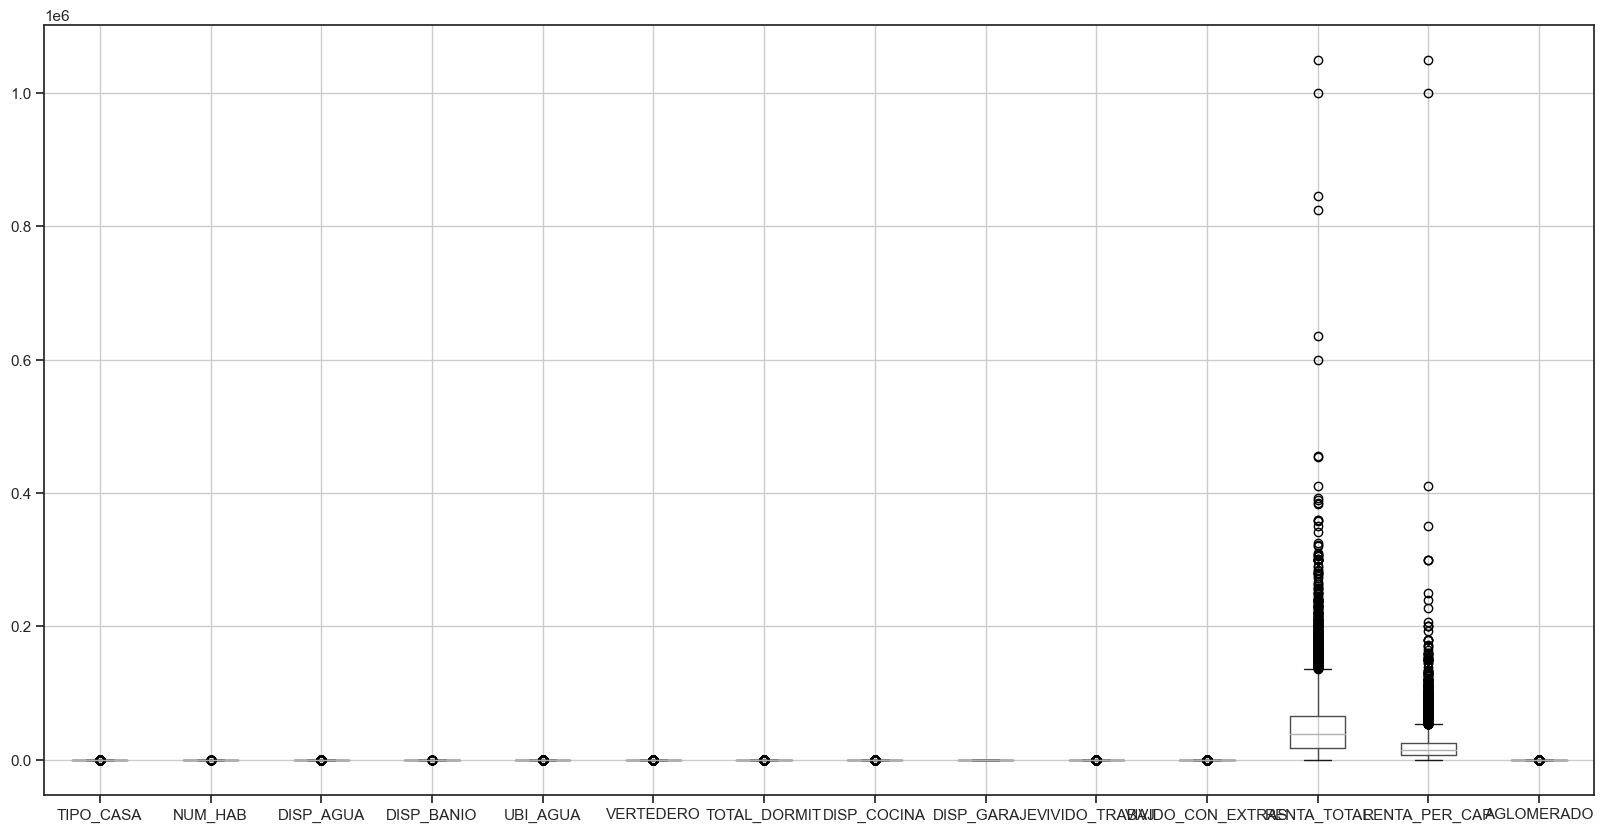

In [20]:
df2020.boxplot(figsize=(20,10))
plt.show()

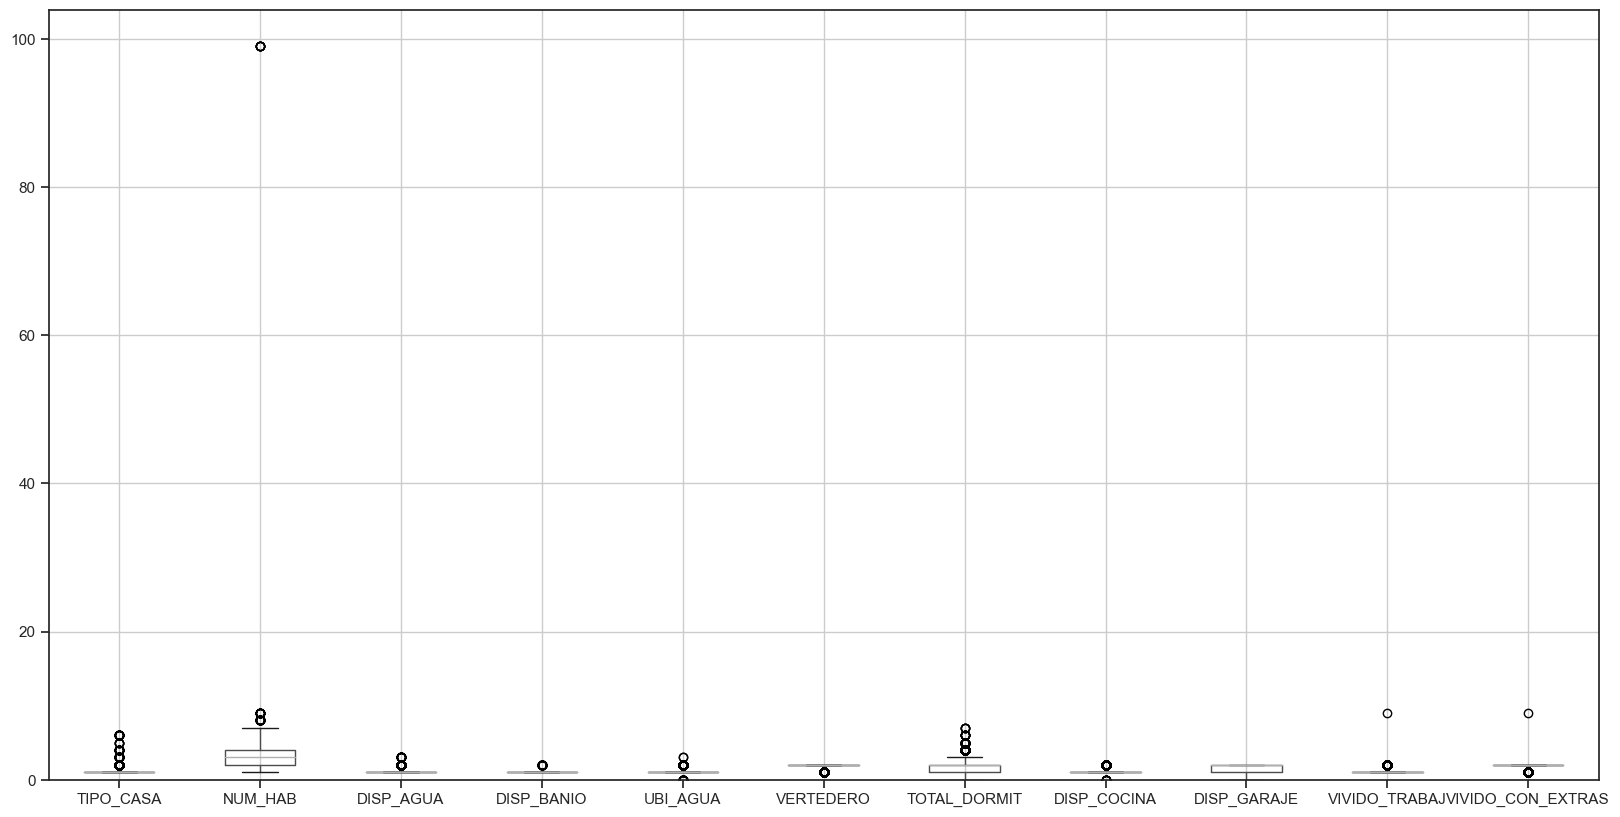

In [21]:
box_20=df2020.drop(['RENTA_TOTAL','RENTA_PER_CAP', 'AGLOMERADO'],axis=1)
box_20.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

## 2022

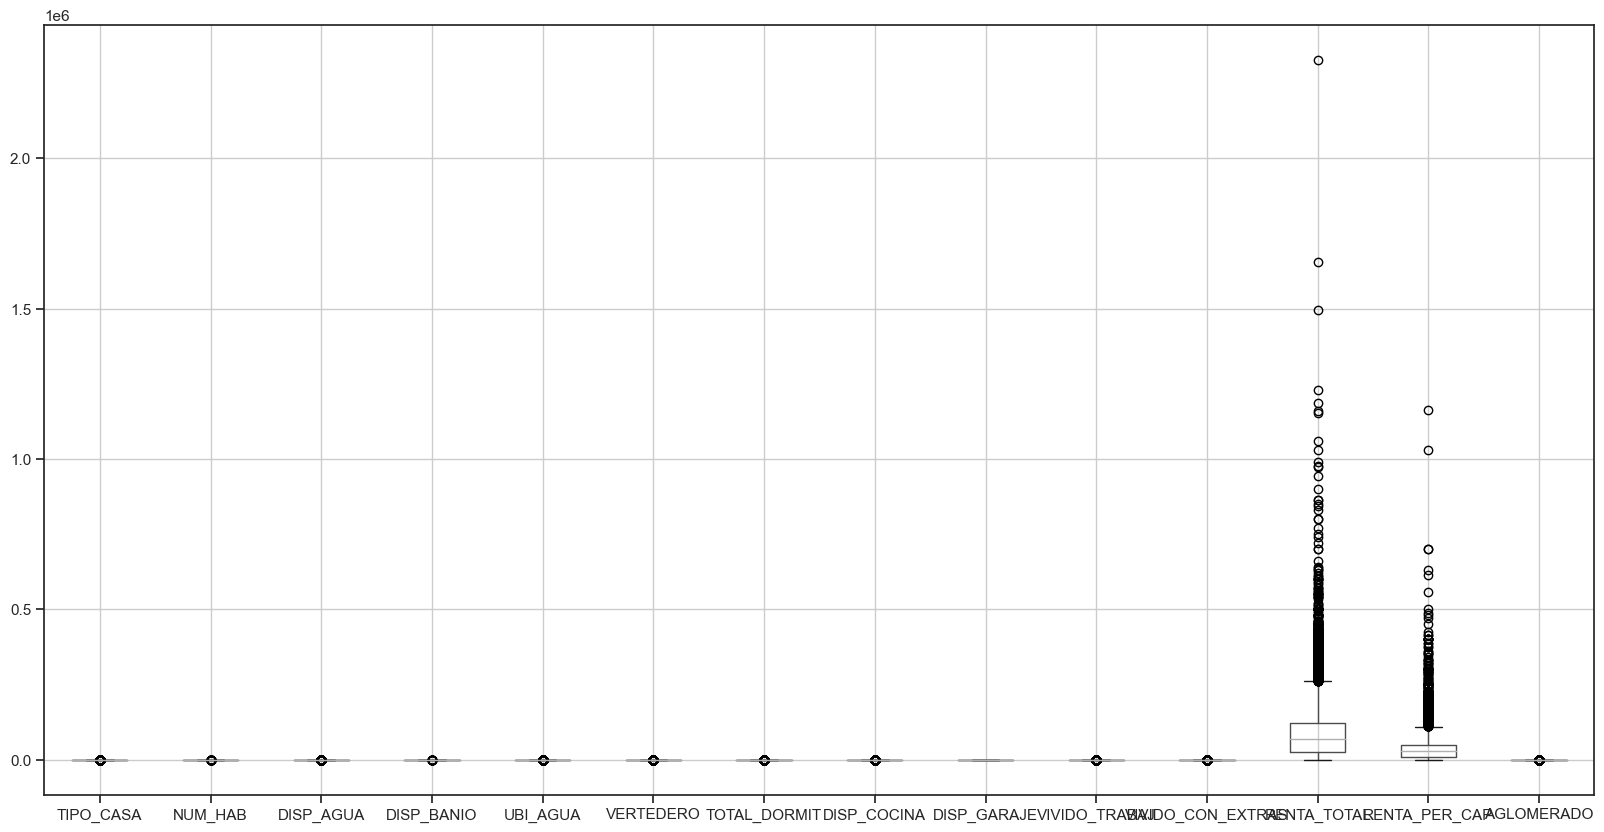

In [22]:
df2022.boxplot(figsize=(20,10))
plt.show()

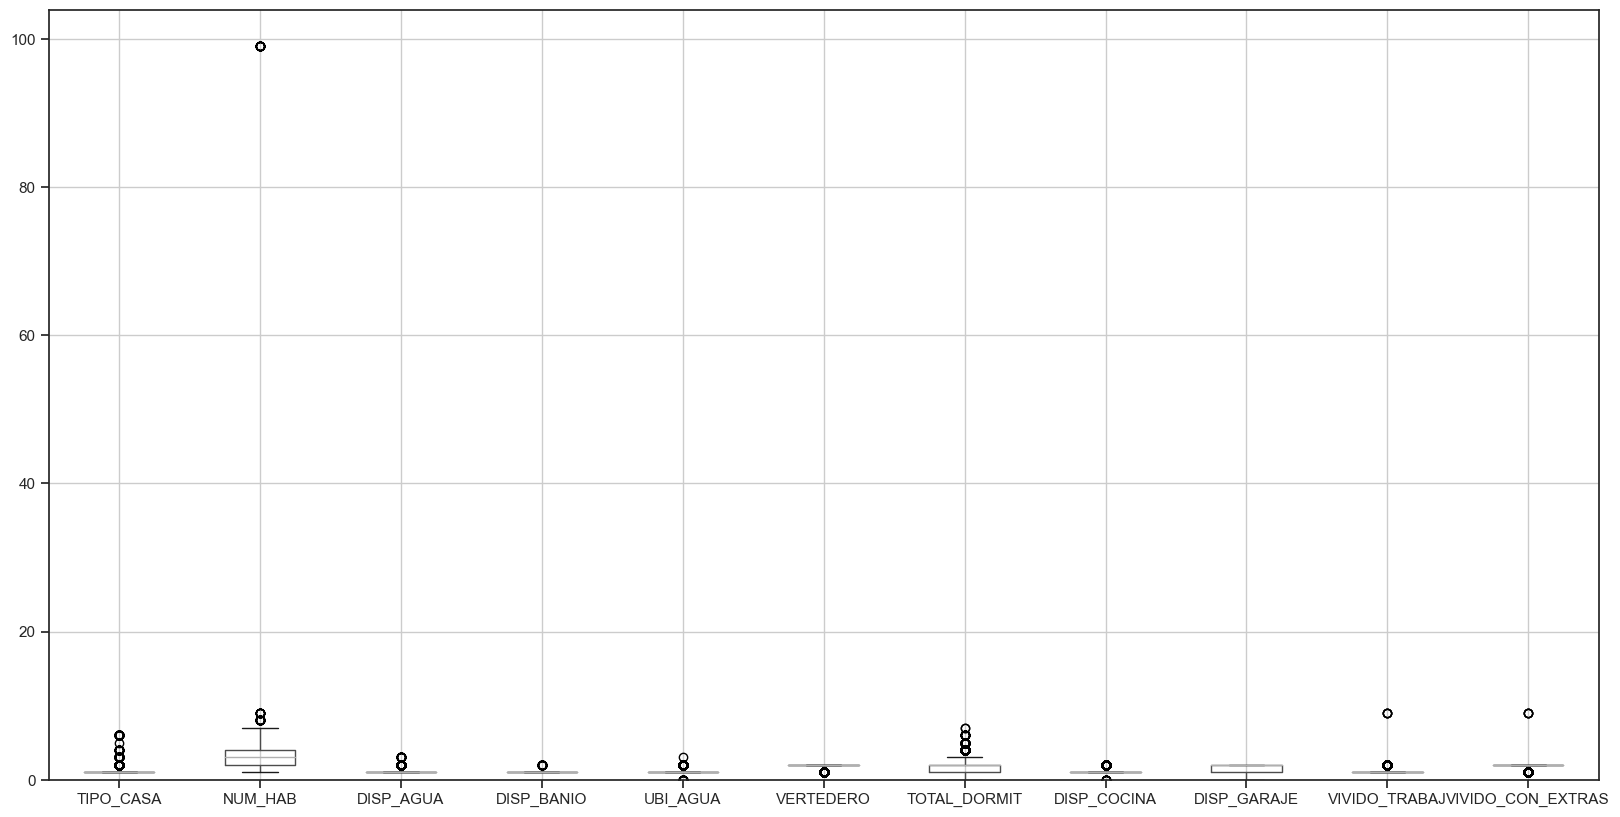

In [23]:
box_22=df2022.drop(['RENTA_TOTAL','RENTA_PER_CAP', 'AGLOMERADO'],axis=1)
box_22.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

Como podemos observar, tenemos 99 para el número de habitaciones en una casa y, dado que no se acercan siquiera al cuartil superior, los eliminaremos:

## 2016

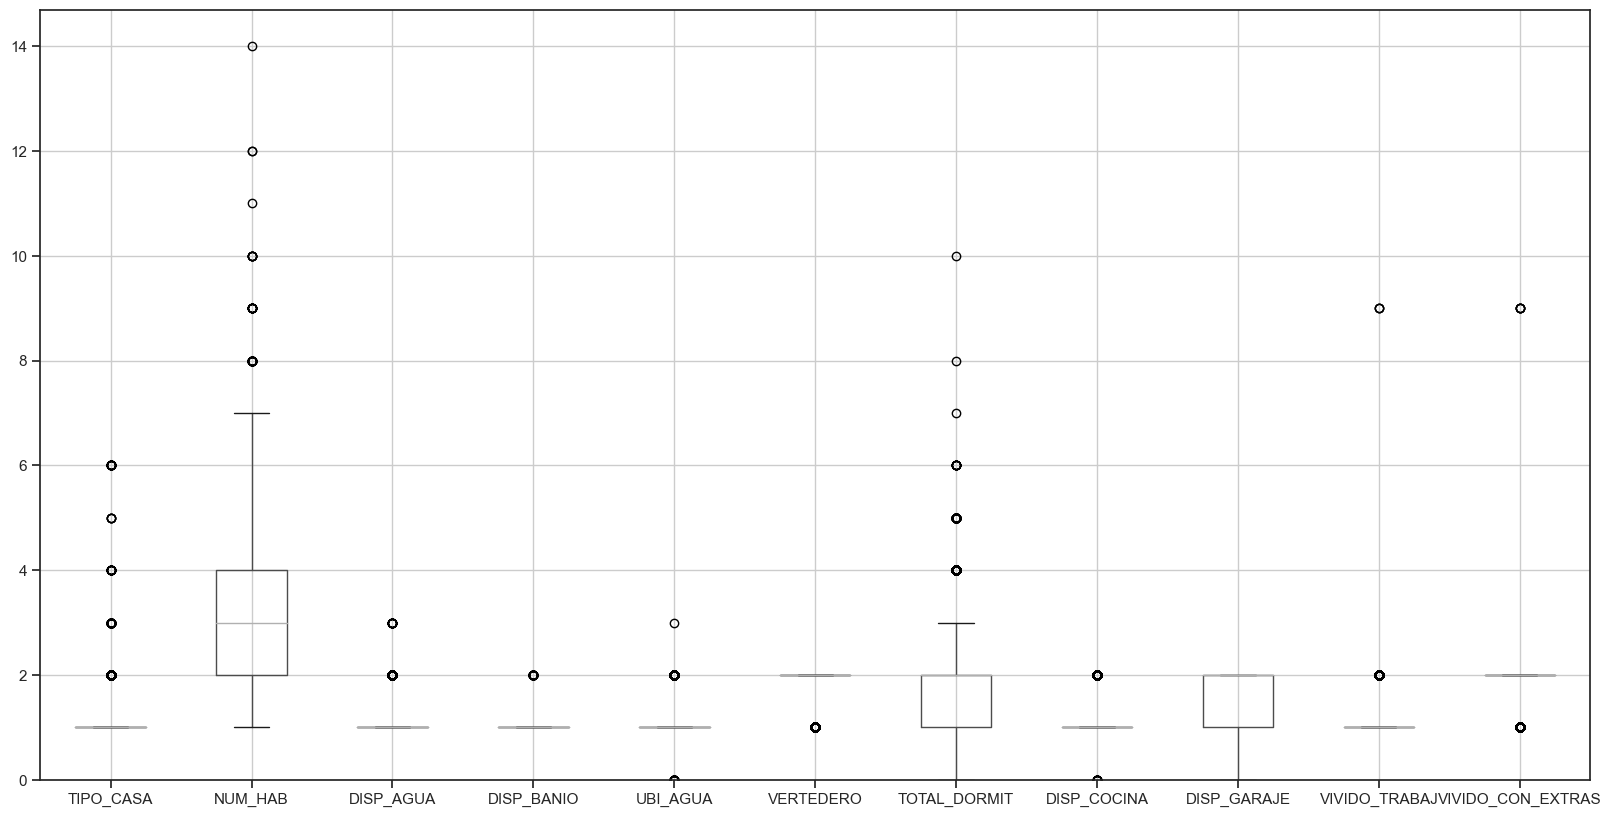

In [24]:
mean_NUM_HAB = np.mean(df2016.loc[df2016['NUM_HAB'] != 99, 'NUM_HAB'])
df2016.loc[df2016['NUM_HAB'] == 99, 'NUM_HAB'] = mean_NUM_HAB
df2016['NUM_HAB'].value_counts()
box_16=df2016.drop(['RENTA_TOTAL','RENTA_PER_CAP', 'AGLOMERADO'],axis=1)
box_16.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

## 2018

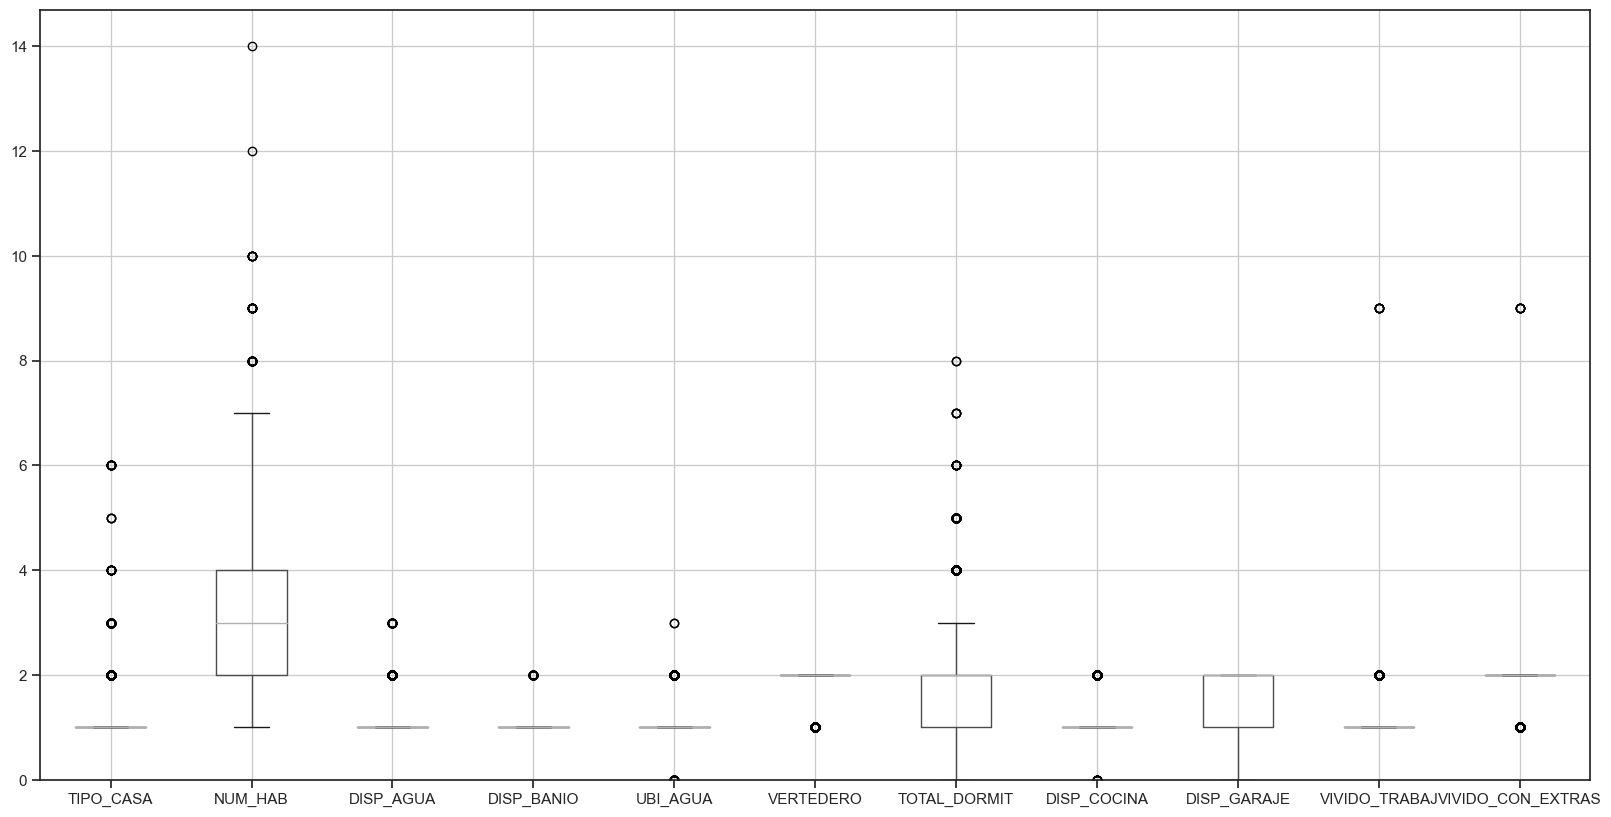

In [25]:
mean_NUM_HAB = np.mean(df2018.loc[df2018['NUM_HAB'] != 99, 'NUM_HAB'])
df2018.loc[df2018['NUM_HAB'] == 99, 'NUM_HAB'] = mean_NUM_HAB
df2016['NUM_HAB'].value_counts()
box_18=df2018.drop(['RENTA_TOTAL','RENTA_PER_CAP', 'AGLOMERADO'],axis=1)
box_18.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

## 2020

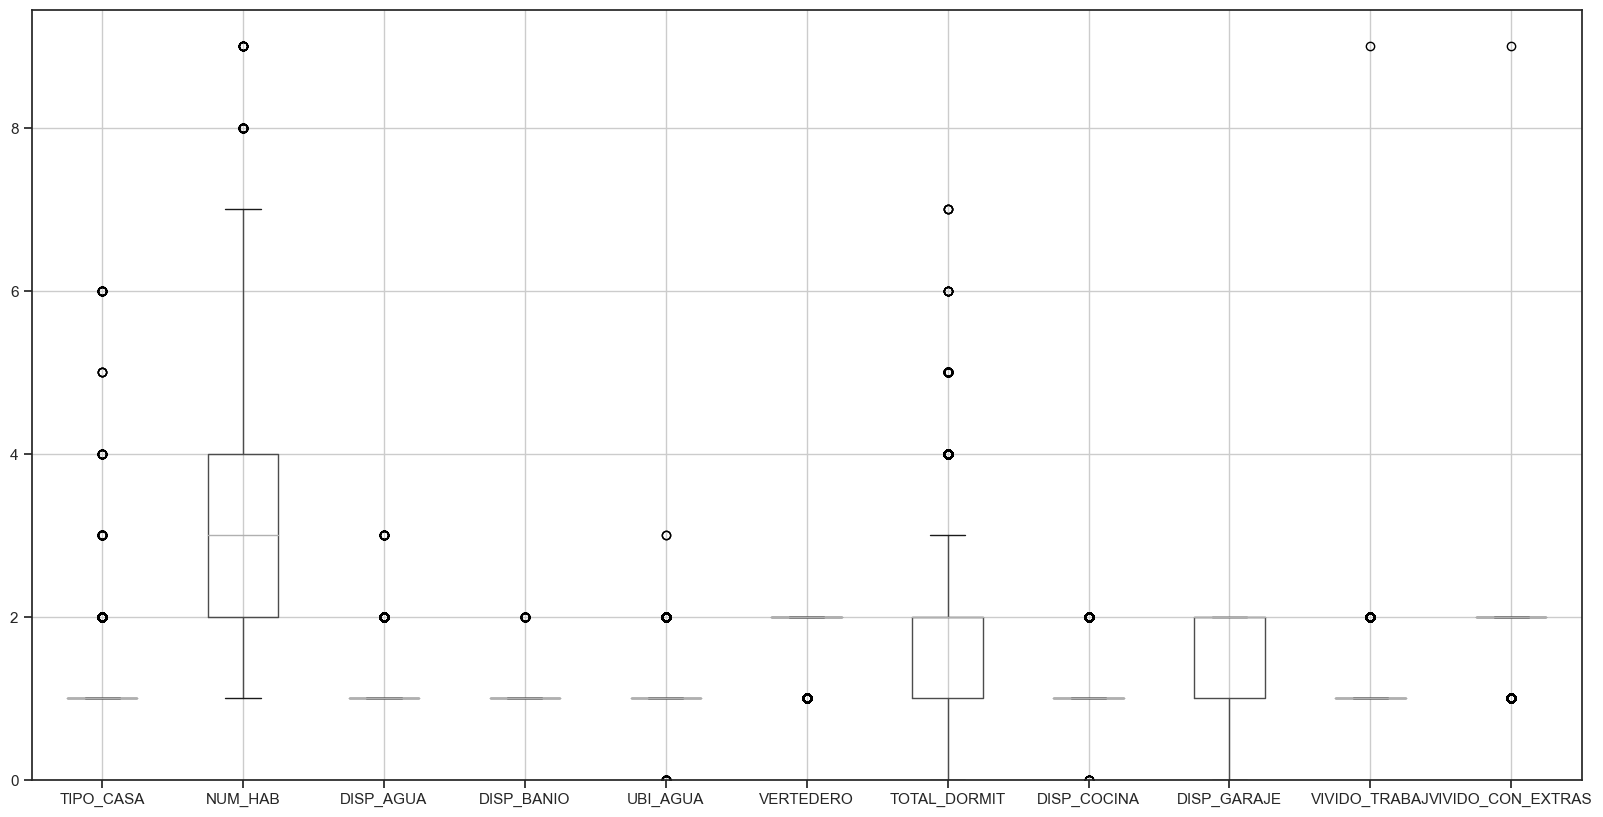

In [26]:
mean_NUM_HAB = np.mean(df2020.loc[df2020['NUM_HAB'] != 99, 'NUM_HAB'])
df2020.loc[df2020['NUM_HAB'] == 99, 'NUM_HAB'] = mean_NUM_HAB
df2020['NUM_HAB'].value_counts()
box_20=df2020.drop(['RENTA_TOTAL','RENTA_PER_CAP', 'AGLOMERADO'],axis=1)
box_20.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

## 2022

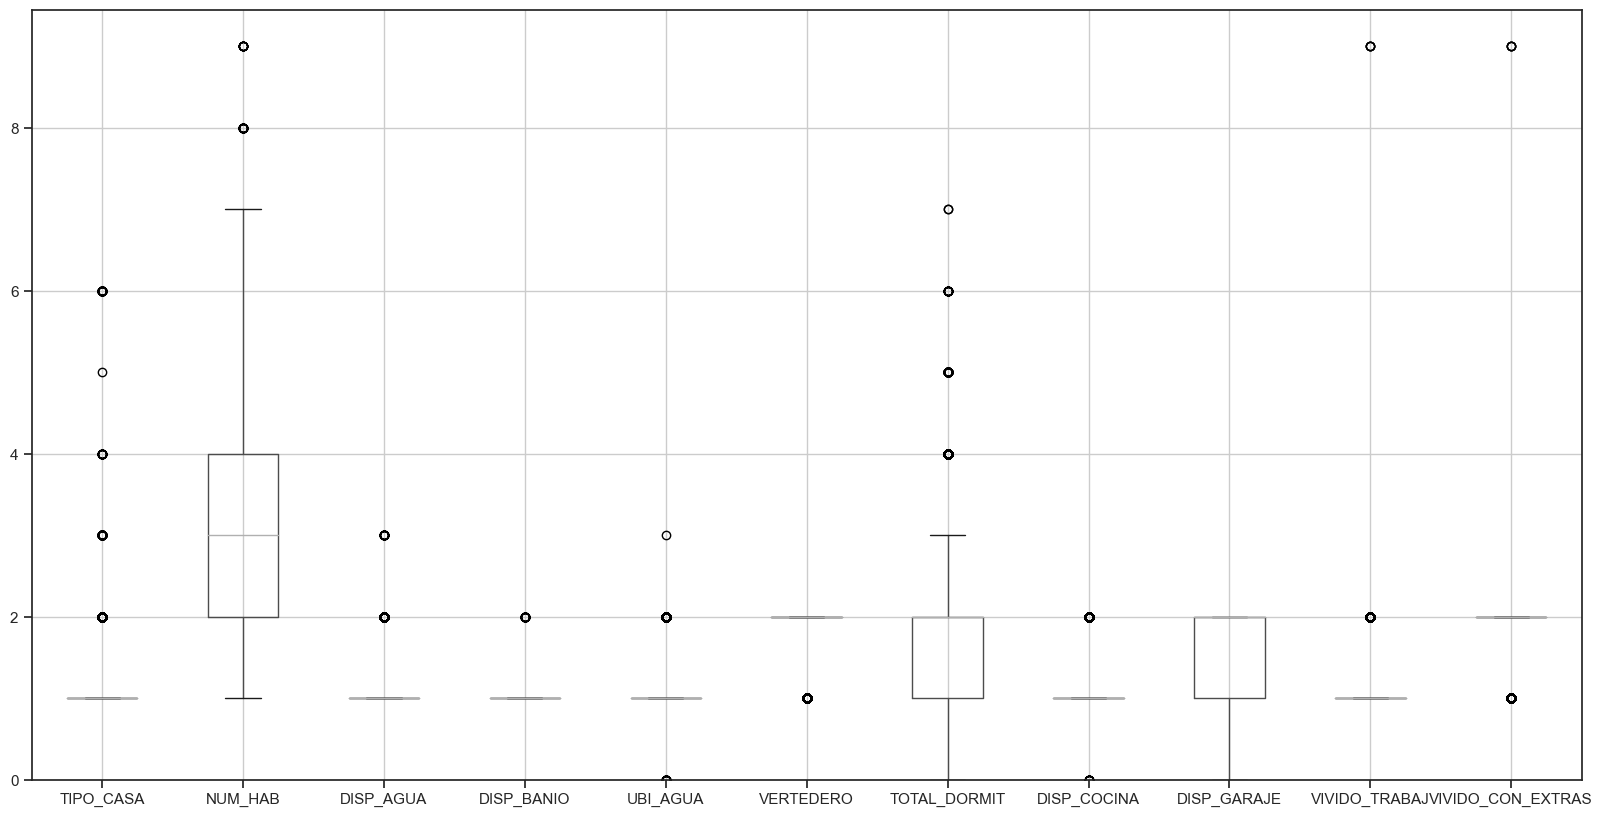

In [27]:
mean_NUM_HAB = np.mean(df2022.loc[df2022['NUM_HAB'] != 99, 'NUM_HAB'])
df2022.loc[df2022['NUM_HAB'] == 99, 'NUM_HAB'] = mean_NUM_HAB
df2022['NUM_HAB'].value_counts()
box_22=df2022.drop(['RENTA_TOTAL','RENTA_PER_CAP', 'AGLOMERADO'],axis=1)
box_22.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

Ahora visualizaremos la distribución de nuestros 4 datasets:

## 2016

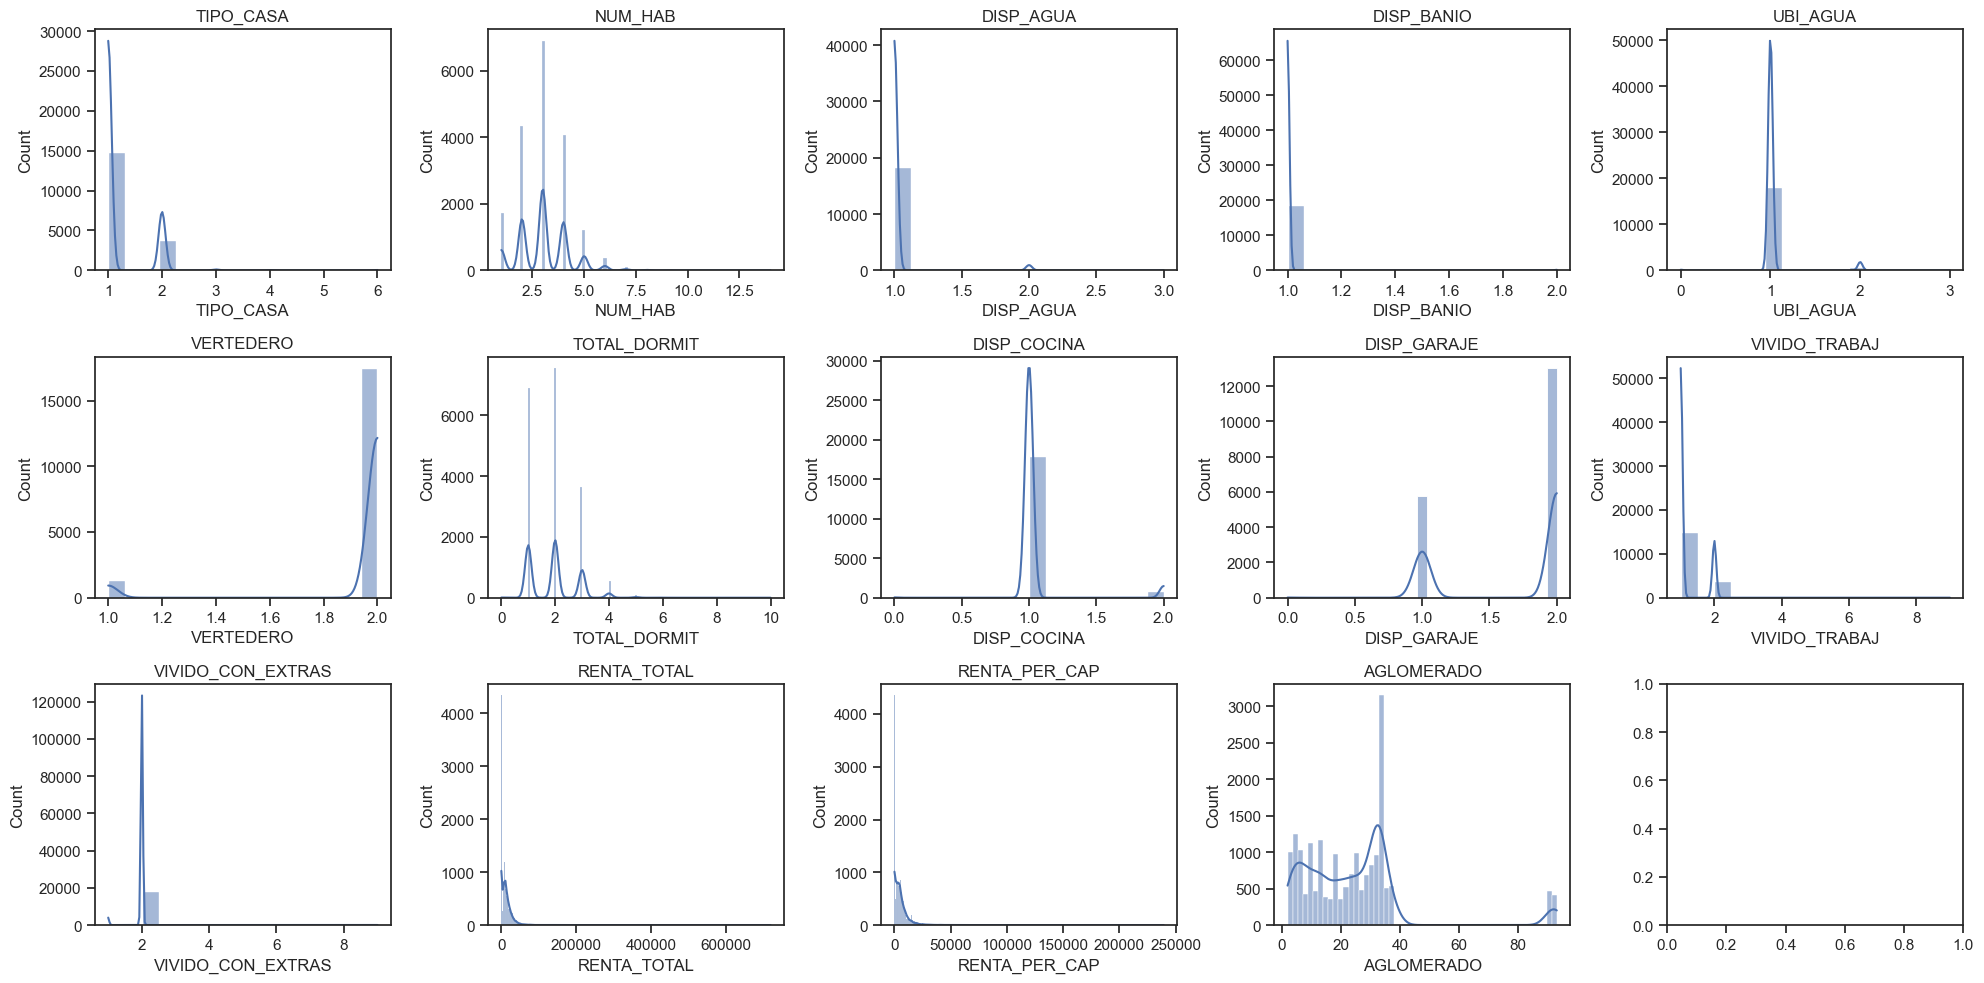

In [28]:
num_rows = 3
num_cols = 5
variable_names = list(df2016.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=df2016[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

## 2018

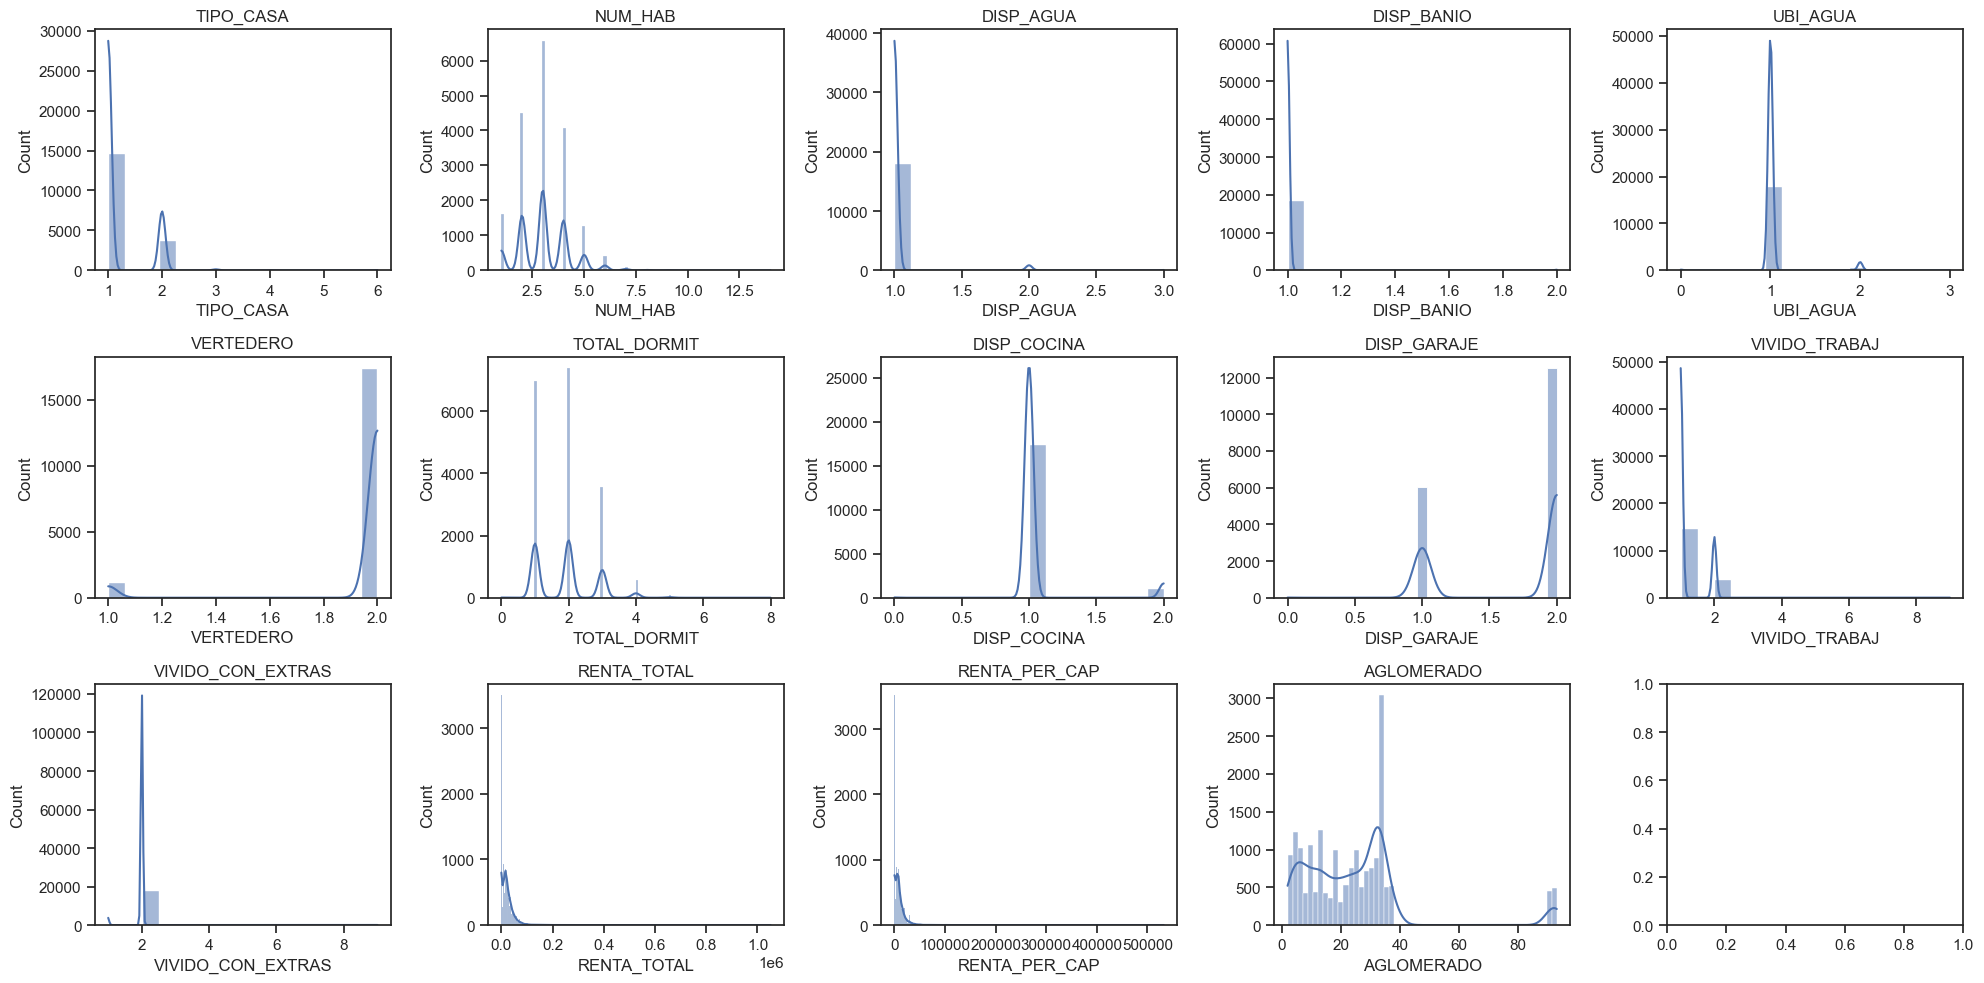

In [29]:
num_rows = 3
num_cols = 5
variable_names = list(df2018.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=df2018[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

## 2020

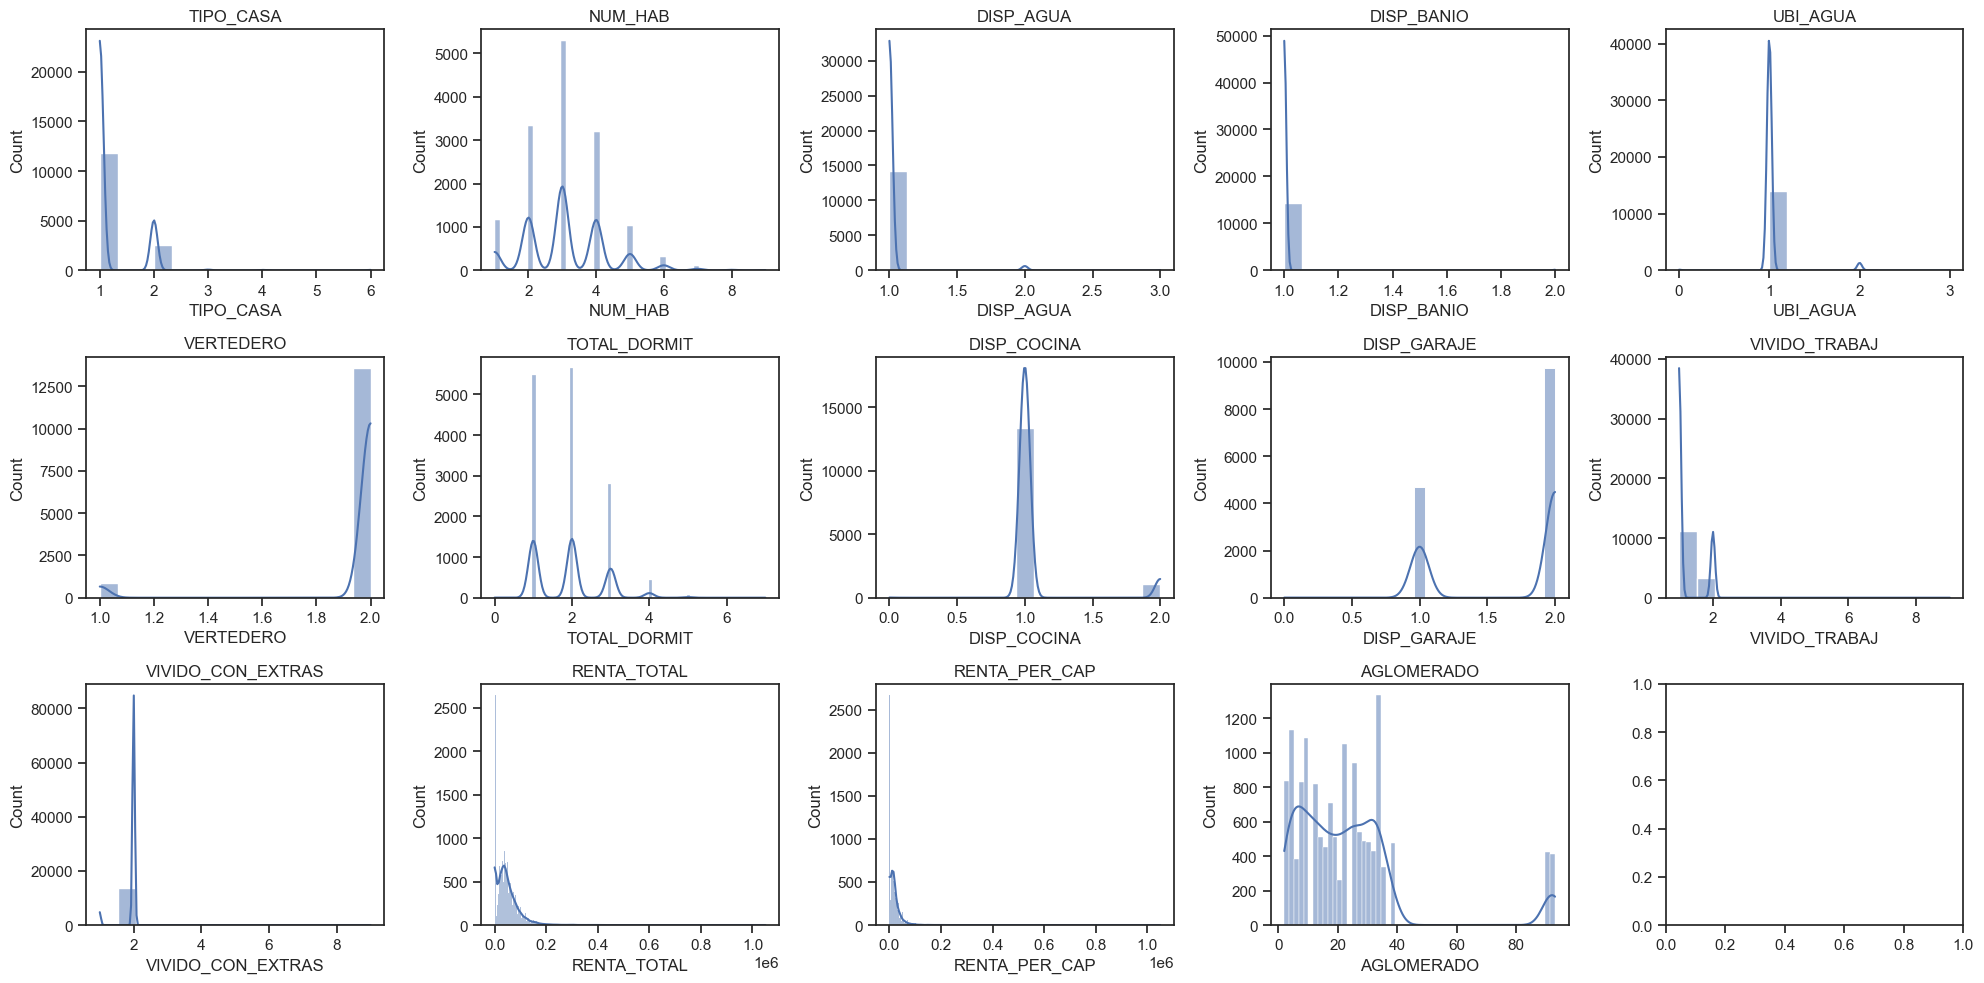

In [30]:
num_rows = 3
num_cols = 5
variable_names = list(df2020.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=df2020[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

## 2022

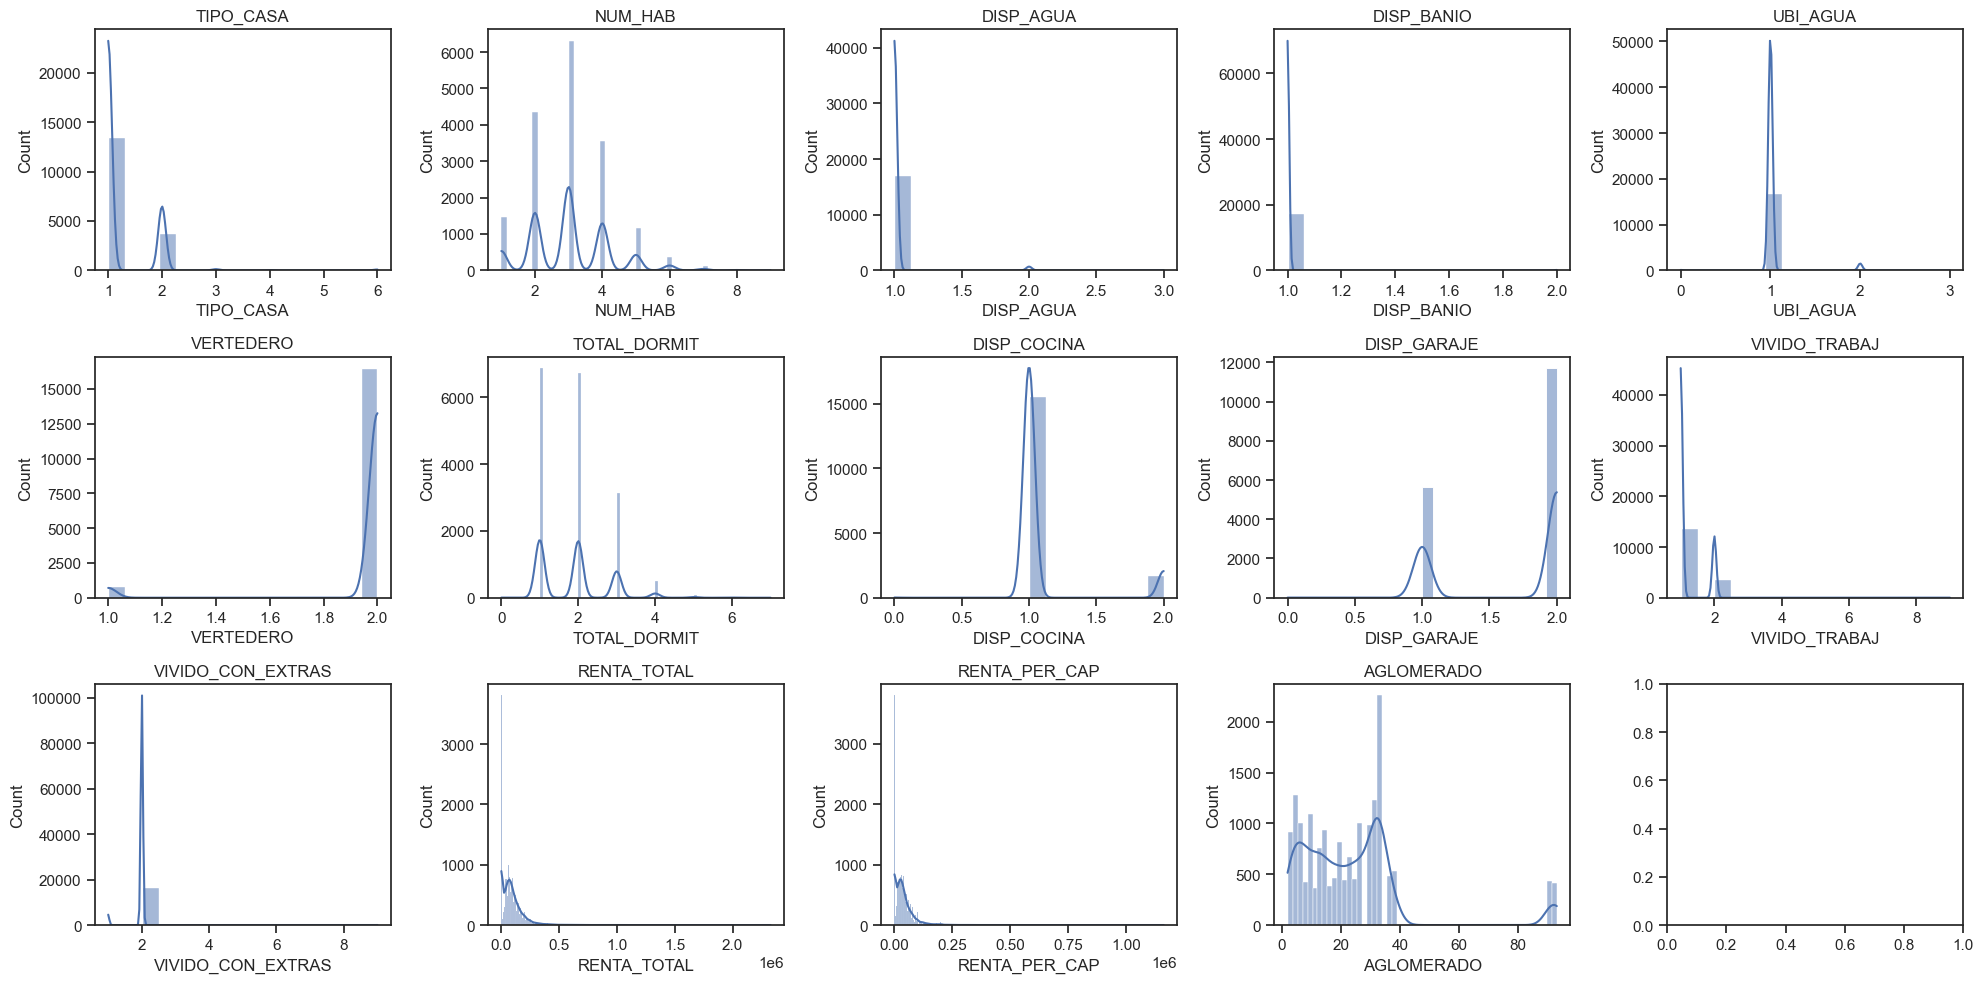

In [31]:
num_rows = 3
num_cols = 5
variable_names = list(df2022.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=df2022[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

In [36]:
df2016.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_2016.csv', index=False)
df2018.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_2018.csv', index=False)
df2020.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_2020.csv', index=False)
df2022.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_2022.csv', index=False)

# Análisis del dato

In [37]:
df2016 = pd.read_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_2016.csv', sep=",")
df2018 = pd.read_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_2018.csv', sep=",")
df2020 = pd.read_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_2020.csv', sep=",")
df2022 = pd.read_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_2022.csv', sep=",")

### Matriz de correlación
A continuación, calcularemos la matriz de correlación para las 4 bases de datos correspondientes a 2016, 2018, 2020 y 2022 para poder determinar cuales son aquellas variables que tienen una mayor correlación con la varible "victimas_vio_gen".

                   TIPO_CASA   NUM_HAB  DISP_AGUA  DISP_BANIO  UBI_AGUA  \
TIPO_CASA           1.000000 -0.211065   0.024363    0.023187  0.012617   
NUM_HAB            -0.211065  1.000000  -0.131818   -0.070723 -0.097208   
DISP_AGUA           0.024363 -0.131818   1.000000    0.173938  0.482808   
DISP_BANIO          0.023187 -0.070723   0.173938    1.000000 -0.276669   
UBI_AGUA            0.012617 -0.097208   0.482808   -0.276669  1.000000   
VERTEDERO           0.036475 -0.009186  -0.065080   -0.002179 -0.067870   
TOTAL_DORMIT       -0.188992  0.535662  -0.060936   -0.042867 -0.032801   
DISP_COCINA         0.053020 -0.106175   0.170448    0.066086  0.123588   
DISP_GARAJE         0.200586 -0.249826   0.092728    0.031689  0.085243   
VIVIDO_TRABAJ       0.052318 -0.052879  -0.017855   -0.007101 -0.024818   
VIVIDO_CON_EXTRAS   0.010332  0.024515  -0.044013   -0.012949 -0.043648   
RENTA_TOTAL        -0.012179  0.161810  -0.050240   -0.021974 -0.046733   
RENTA_PER_CAP       0.089

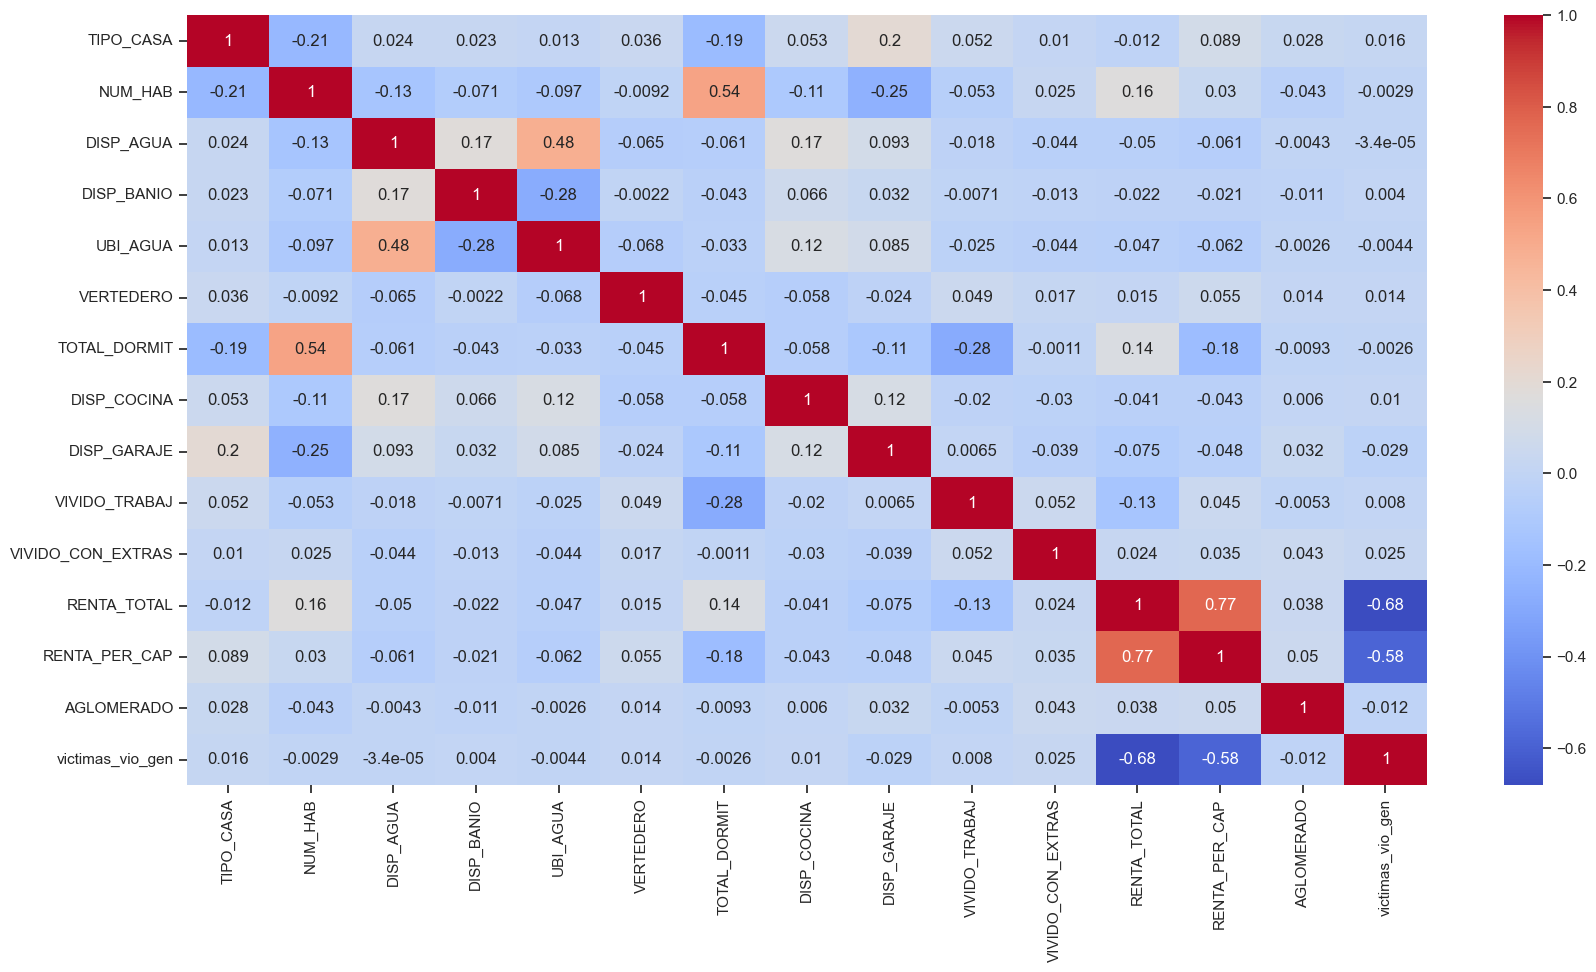

In [38]:
# 2016
# Calcular la matriz de correlación
matriz_corr = df2016.corr()
print(df2016.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2016.corr(), annot=True, cmap='coolwarm')
plt.show()

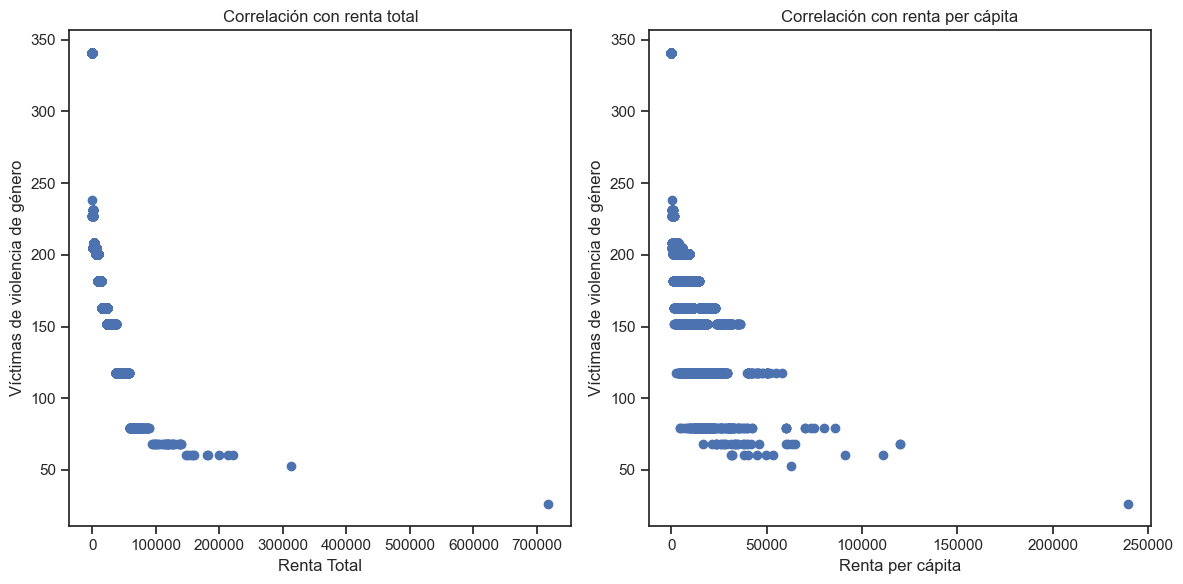

In [39]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los tres gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersión para la correlación con RENTA_TOTAL
axs[0].scatter(df2016['RENTA_TOTAL'], df2016['victimas_vio_gen'])
axs[0].set_title('Correlación con renta total')
axs[0].set_xlabel('Renta Total')
axs[0].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con RENTA_PER_CAP
axs[1].scatter(df2016['RENTA_PER_CAP'], df2016['victimas_vio_gen'])
axs[1].set_title('Correlación con renta per cápita')
axs[1].set_xlabel('Renta per cápita')
axs[1].set_ylabel('Víctimas de violencia de género')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

In [40]:
from scipy.stats import pearsonr

# Calcular el valor p para la correlación entre "victimas de violencia de género" e "RENTA_TOTAL"
corr_coef_rentatotal, p_valor_rentatotal = pearsonr(df2016['victimas_vio_gen'], df2016['RENTA_TOTAL'])
print("Correlación con renta total:")
print("Coeficiente de correlación:", corr_coef_rentatotal)
print("Valor p:", format(p_valor_rentatotal, '.5f'))


# Calcular el valor p para la correlación entre "victimas de violencia de género" y "RENTA_PER_CAP"
corr_coef_rentapercap, p_valor_rentapercap = pearsonr(df2022['victimas_vio_gen'], df2022['RENTA_PER_CAP'])
print("\nCorrelación con renta per cápita:")
print("Coeficiente de correlación:", corr_coef_rentapercap)
print("Valor p:", format(p_valor_rentapercap, '.5f'))

Correlación con renta total:
Coeficiente de correlación: -0.6807497772609495
Valor p: 0.00012

Correlación con renta per cápita:
Coeficiente de correlación: -0.5329734297373694
Valor p: 0.00002


                   TIPO_CASA   NUM_HAB  DISP_AGUA  DISP_BANIO  UBI_AGUA  \
TIPO_CASA           1.000000 -0.229900   0.051899    0.054232  0.026365   
NUM_HAB            -0.229900  1.000000  -0.130504   -0.068952 -0.091150   
DISP_AGUA           0.051899 -0.130504   1.000000    0.211272  0.431846   
DISP_BANIO          0.054232 -0.068952   0.211272    1.000000 -0.292914   
UBI_AGUA            0.026365 -0.091150   0.431846   -0.292914  1.000000   
VERTEDERO           0.046134  0.011565  -0.084419   -0.006011 -0.060011   
TOTAL_DORMIT       -0.204276  0.541668  -0.069354   -0.034726 -0.056115   
DISP_COCINA         0.050370 -0.092367   0.172630    0.079236  0.137310   
DISP_GARAJE         0.204190 -0.248391   0.090470    0.033667  0.093988   
VIVIDO_TRABAJ       0.042811 -0.075887  -0.008395   -0.001518 -0.022718   
VIVIDO_CON_EXTRAS   0.029023  0.017248  -0.028848   -0.016204 -0.033875   
RENTA_TOTAL        -0.018597  0.194738  -0.062704   -0.030656 -0.050195   
RENTA_PER_CAP       0.095

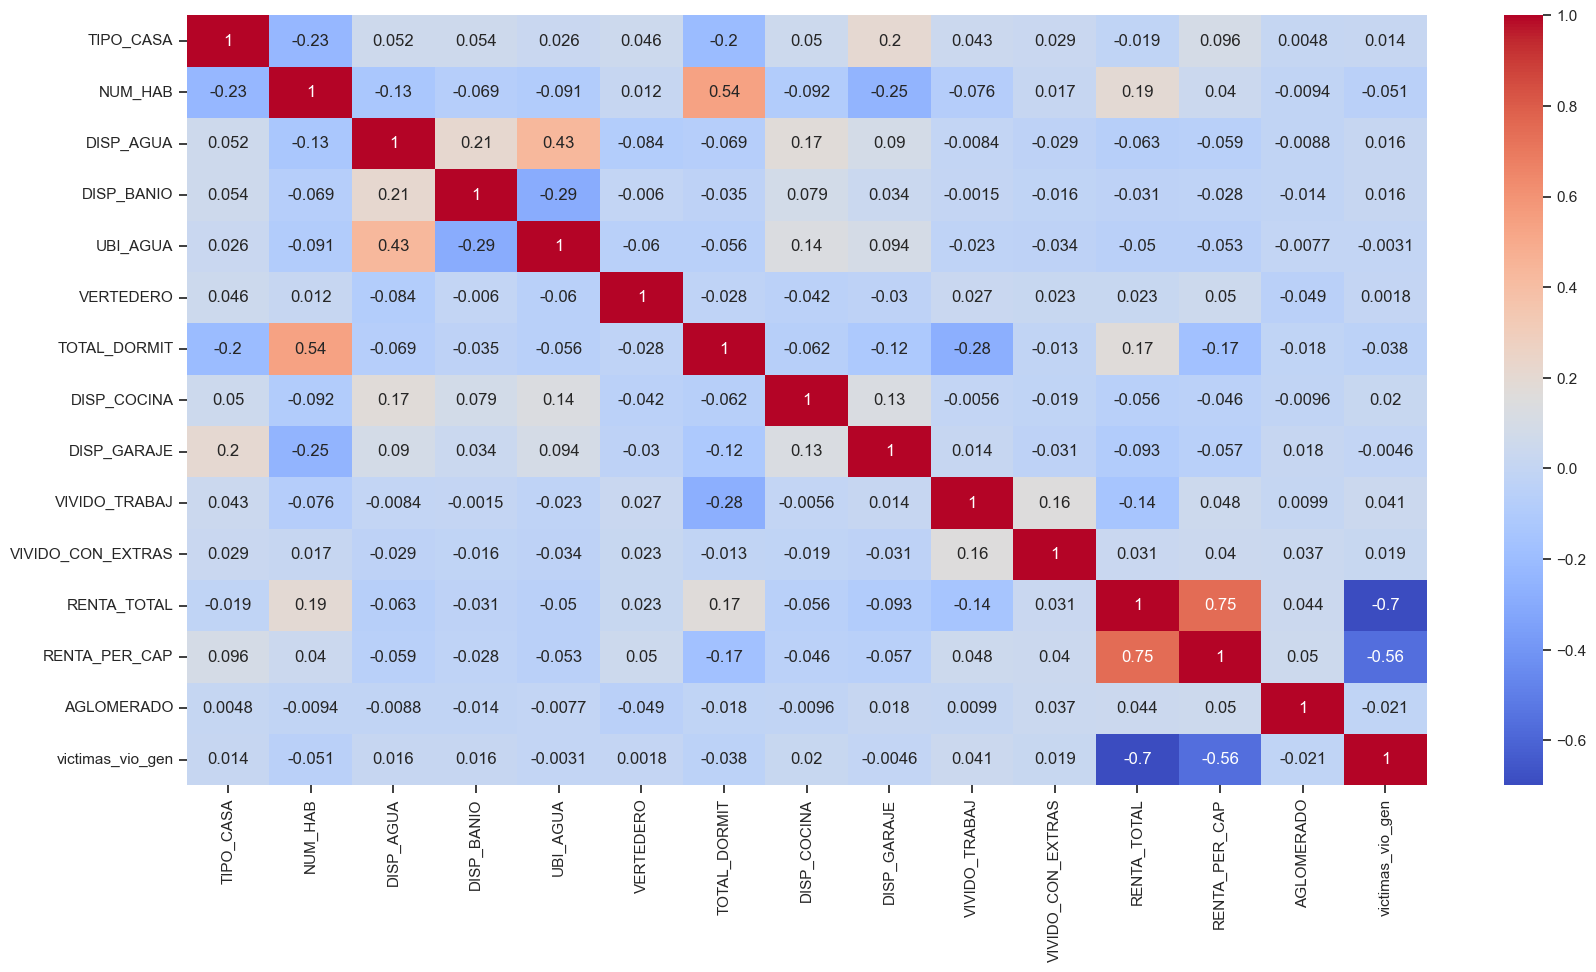

In [41]:
# 2018
# Calcular la matriz de correlación
matriz_corr = df2018.corr()
print(df2018.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2018.corr(), annot=True, cmap='coolwarm')
plt.show()

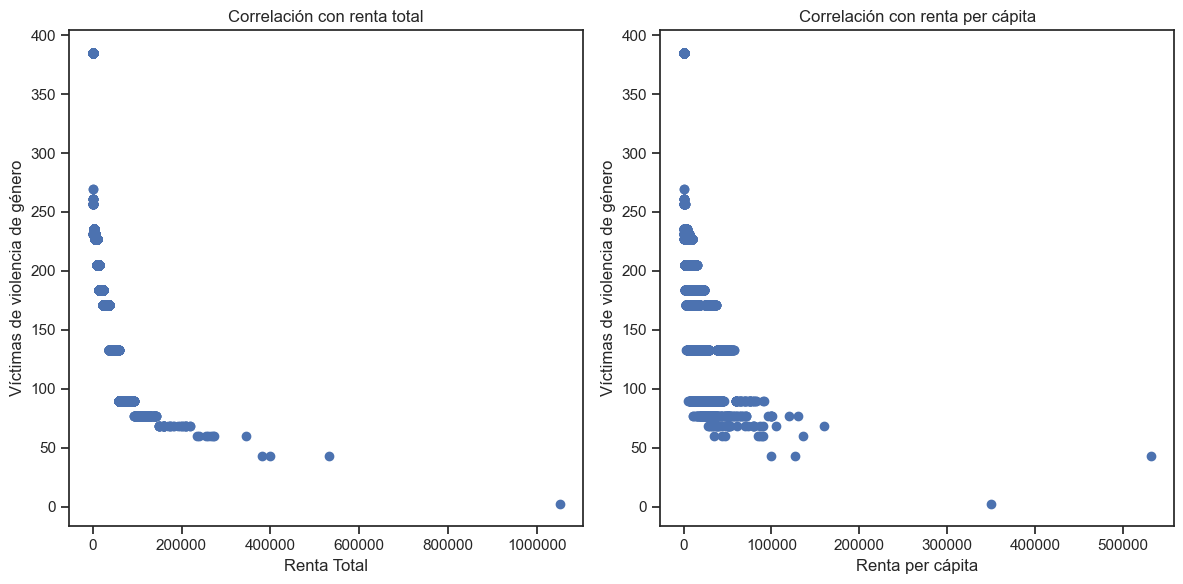

In [53]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los tres gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersión para la correlación con RENTA_TOTAL
axs[0].scatter(df2018['RENTA_TOTAL'], df2018['victimas_vio_gen'])
axs[0].set_title('Correlación con renta total')
axs[0].set_xlabel('Renta Total')
axs[0].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con RENTA_PER_CAP
axs[1].scatter(df2018['RENTA_PER_CAP'], df2018['victimas_vio_gen'])
axs[1].set_title('Correlación con renta per cápita')
axs[1].set_xlabel('Renta per cápita')
axs[1].set_ylabel('Víctimas de violencia de género')

# Evitar la notación científica en eje x
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

In [45]:
from scipy.stats import pearsonr

# Calcular el valor p para la correlación entre "victimas de violencia de género" e "RENTA_TOTAL"
corr_coef_rentatotal, p_valor_rentatotal = pearsonr(df2016['victimas_vio_gen'], df2016['RENTA_TOTAL'])
print("Correlación con renta total:")
print("Coeficiente de correlación:", corr_coef_rentatotal)
print("Valor p:", format(p_valor_rentatotal, '.5f'))


# Calcular el valor p para la correlación entre "victimas de violencia de género" y "RENTA_PER_CAP"
corr_coef_rentapercap, p_valor_rentapercap = pearsonr(df2022['victimas_vio_gen'], df2022['RENTA_PER_CAP'])
print("\nCorrelación con renta per cápita:")
print("Coeficiente de correlación:", corr_coef_rentapercap)
print("Valor p:", format(p_valor_rentapercap, '.5f'))

Correlación con renta total:
Coeficiente de correlación: -0.6807497772609495
Valor p: 0.00101

Correlación con renta per cápita:
Coeficiente de correlación: -0.5329734297373694
Valor p: 0.00422


                   TIPO_CASA   NUM_HAB  DISP_AGUA  DISP_BANIO  UBI_AGUA  \
TIPO_CASA           1.000000 -0.228138   0.071582    0.039283  0.047960   
NUM_HAB            -0.228138  1.000000  -0.124641   -0.070456 -0.090634   
DISP_AGUA           0.071582 -0.124641   1.000000    0.201502  0.387896   
DISP_BANIO          0.039283 -0.070456   0.201502    1.000000 -0.299087   
UBI_AGUA            0.047960 -0.090634   0.387896   -0.299087  1.000000   
VERTEDERO           0.053781 -0.019086  -0.054535   -0.002917 -0.079675   
TOTAL_DORMIT       -0.189978  0.517847  -0.061757   -0.047631 -0.048930   
DISP_COCINA         0.044478 -0.096552   0.110504    0.068618  0.083329   
DISP_GARAJE         0.187096 -0.248821   0.081525    0.037050  0.074283   
VIVIDO_TRABAJ       0.027215 -0.056866  -0.007457   -0.015990 -0.010056   
VIVIDO_CON_EXTRAS   0.001057  0.051931  -0.090095   -0.016186 -0.074583   
RENTA_TOTAL        -0.012055  0.197011  -0.055732   -0.022024 -0.047671   
RENTA_PER_CAP       0.089

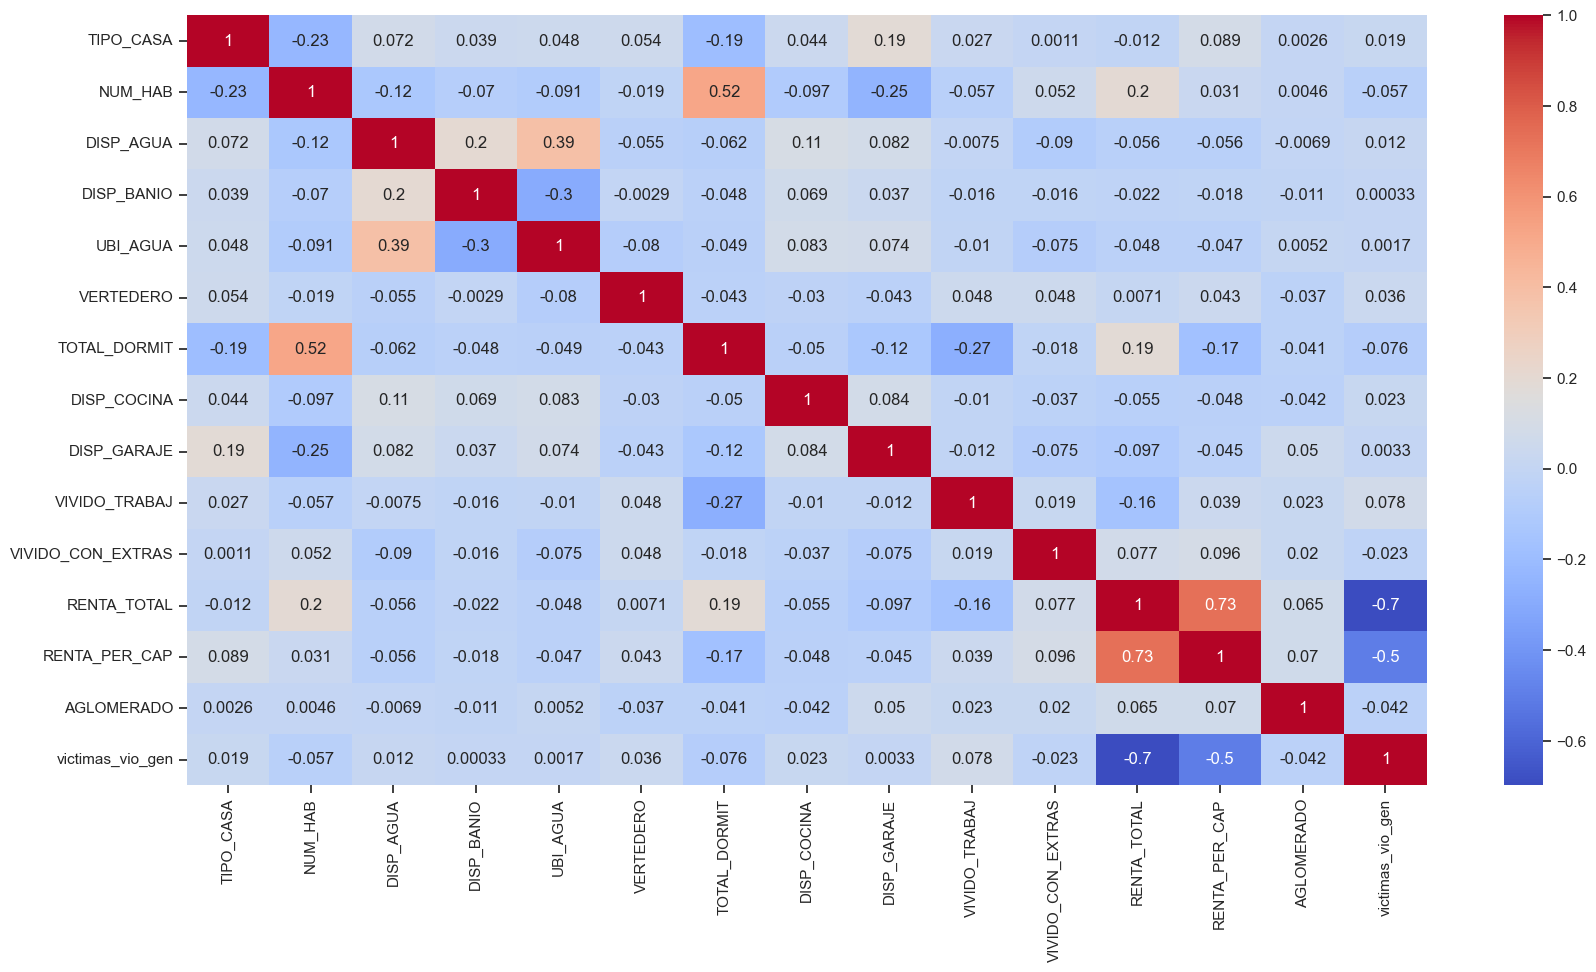

In [46]:
# 2020
# Calcular la matriz de correlación
matriz_corr = df2020.corr()
print(df2020.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2020.corr(), annot=True, cmap='coolwarm')
plt.show()

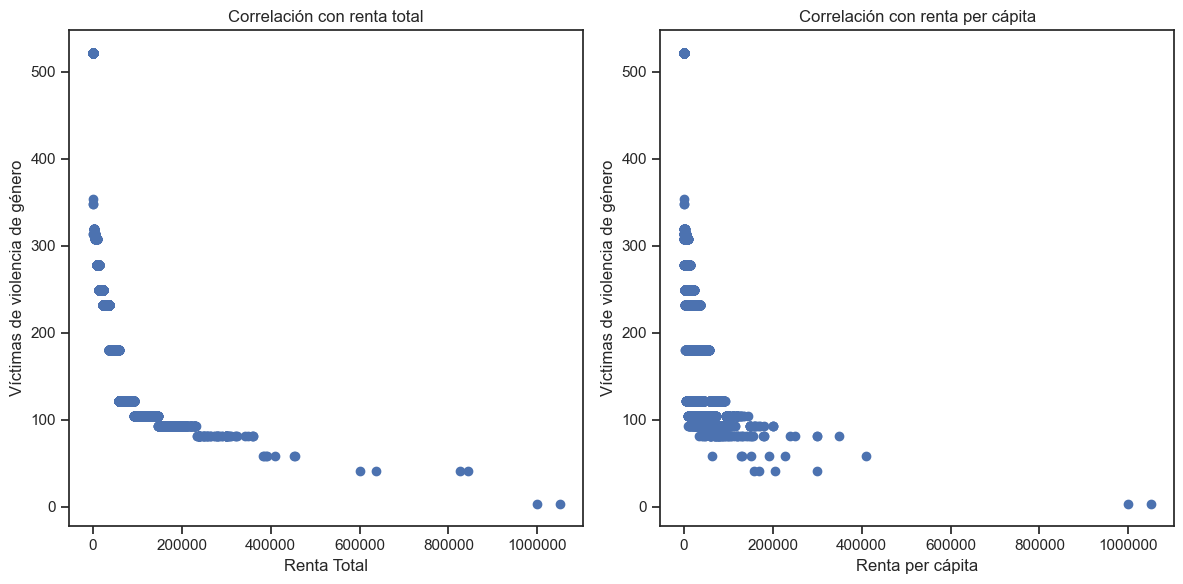

In [54]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los tres gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersión para la correlación con RENTA_TOTAL
axs[0].scatter(df2020['RENTA_TOTAL'], df2020['victimas_vio_gen'])
axs[0].set_title('Correlación con renta total')
axs[0].set_xlabel('Renta Total')
axs[0].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con RENTA_PER_CAP
axs[1].scatter(df2020['RENTA_PER_CAP'], df2020['victimas_vio_gen'])
axs[1].set_title('Correlación con renta per cápita')
axs[1].set_xlabel('Renta per cápita')
axs[1].set_ylabel('Víctimas de violencia de género')

# Evitar la notación científica en el eje x
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

In [50]:
from scipy.stats import pearsonr

# Calcular el valor p para la correlación entre "victimas de violencia de género" e "RENTA_TOTAL"
corr_coef_rentatotal, p_valor_rentatotal = pearsonr(df2020['victimas_vio_gen'], df2020['RENTA_TOTAL'])
print("Correlación con renta total:")
print("Coeficiente de correlación:", corr_coef_rentatotal)
print("Valor p:", format(p_valor_rentatotal, '.5f'))


# Calcular el valor p para la correlación entre "victimas de violencia de género" y "RENTA_PER_CAP"
corr_coef_rentapercap, p_valor_rentapercap = pearsonr(df2020['victimas_vio_gen'], df2020['RENTA_PER_CAP'])
print("\nCorrelación con renta per cápita:")
print("Coeficiente de correlación:", corr_coef_rentapercap)
print("Valor p:", format(p_valor_rentapercap, '.5f'))

Correlación con renta total:
Coeficiente de correlación: -0.6979927296754622
Valor p: 0.00010

Correlación con renta per cápita:
Coeficiente de correlación: -0.5044678658184427
Valor p: 0.00092


                   TIPO_CASA   NUM_HAB  DISP_AGUA  DISP_BANIO  UBI_AGUA  \
TIPO_CASA           1.000000 -0.241052   0.064225    0.031112  0.039004   
NUM_HAB            -0.241052  1.000000  -0.125263   -0.065273 -0.095255   
DISP_AGUA           0.064225 -0.125263   1.000000    0.212684  0.386902   
DISP_BANIO          0.031112 -0.065273   0.212684    1.000000 -0.258550   
UBI_AGUA            0.039004 -0.095255   0.386902   -0.258550  1.000000   
VERTEDERO           0.033299 -0.008956  -0.077099   -0.026244 -0.055552   
TOTAL_DORMIT       -0.204386  0.525348  -0.063231   -0.039054 -0.036572   
DISP_COCINA         0.064493 -0.094457   0.106815    0.058852  0.098008   
DISP_GARAJE         0.201442 -0.241608   0.078122    0.030279  0.081338   
VIVIDO_TRABAJ       0.014289 -0.058875  -0.014623   -0.006324 -0.015879   
VIVIDO_CON_EXTRAS   0.024964  0.055929  -0.061585   -0.015279 -0.043351   
RENTA_TOTAL        -0.019010  0.191708  -0.045003   -0.019652 -0.035551   
RENTA_PER_CAP       0.097

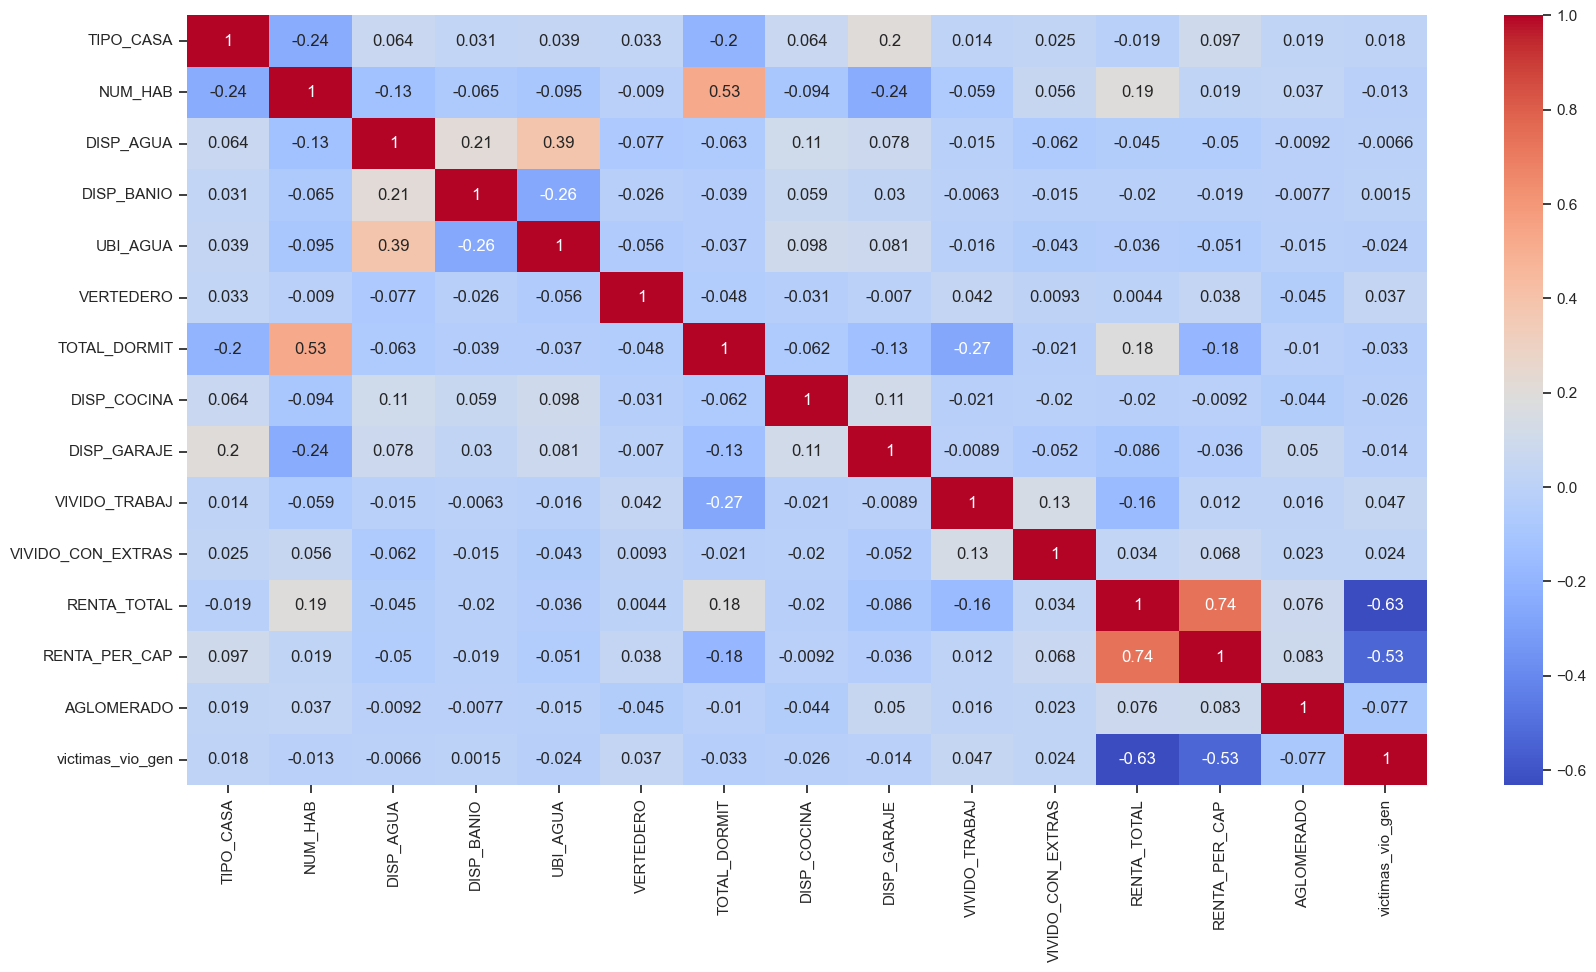

In [51]:
# 2022
# Calcular la matriz de correlación
matriz_corr = df2022.corr()
print(df2022.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(df2022.corr(), annot=True, cmap='coolwarm')
plt.show()

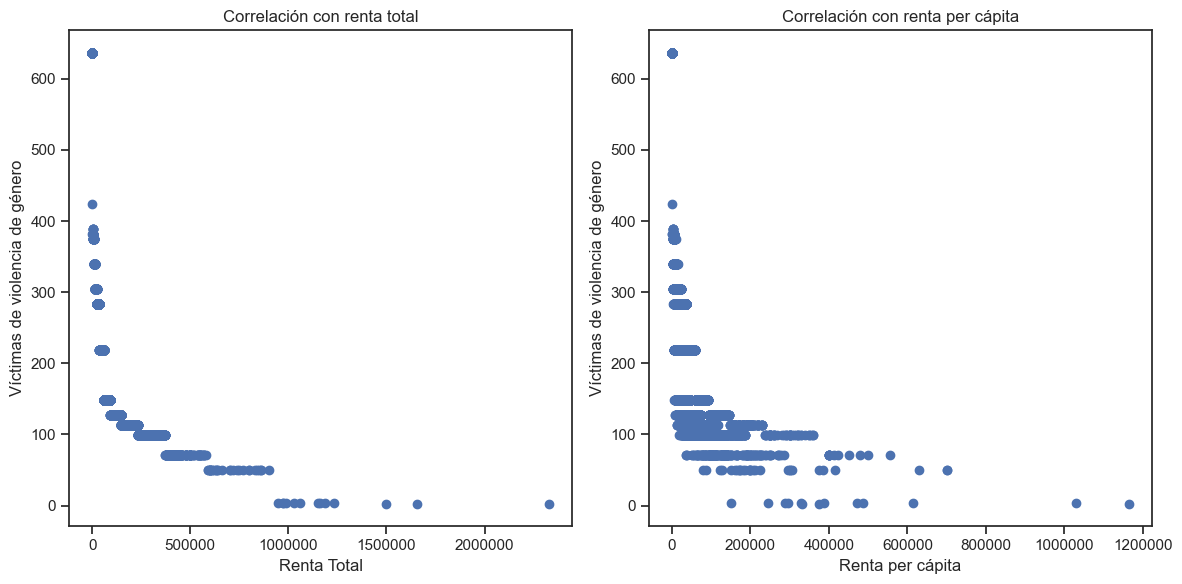

In [55]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los tres gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersión para la correlación con RENTA_TOTAL
axs[0].scatter(df2022['RENTA_TOTAL'], df2022['victimas_vio_gen'])
axs[0].set_title('Correlación con renta total')
axs[0].set_xlabel('Renta Total')
axs[0].set_ylabel('Víctimas de violencia de género')

# Gráfico de dispersión para la correlación con RENTA_PER_CAP
axs[1].scatter(df2022['RENTA_PER_CAP'], df2022['victimas_vio_gen'])
axs[1].set_title('Correlación con renta per cápita')
axs[1].set_xlabel('Renta per cápita')
axs[1].set_ylabel('Víctimas de violencia de género')

# Evitar la notación científica en el eje x
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()

In [57]:
from scipy.stats import pearsonr

# Calcular el valor p para la correlación entre "victimas de violencia de género" e "RENTA_TOTAL"
corr_coef_rentatotal, p_valor_rentatotal = pearsonr(df2022['victimas_vio_gen'], df2022['RENTA_TOTAL'])
print("Correlación con renta total:")
print("Coeficiente de correlación:", corr_coef_rentatotal)
print("Valor p:", format(p_valor_rentatotal, '.5f'))


# Calcular el valor p para la correlación entre "victimas de violencia de género" y "RENTA_PER_CAP"
corr_coef_rentapercap, p_valor_rentapercap = pearsonr(df2022['victimas_vio_gen'], df2022['RENTA_PER_CAP'])
print("\nCorrelación con renta per cápita:")
print("Coeficiente de correlación:", corr_coef_rentapercap)
print("Valor p:", format(p_valor_rentapercap, '.5f'))

Correlación con renta total:
Coeficiente de correlación: -0.6321142843036776
Valor p: 0.00381

Correlación con renta per cápita:
Coeficiente de correlación: -0.5329734297373694
Valor p: 0.00402


Como hemos visto, en los 4 años, las variables que tienen mayor correlación con "victimas_vio_gen" coinciden, por lo que nos quedaremos con estas 2 variables en las 4 bases de datos: RENTA_TOTAL y RENTA_PER_CAP.

In [58]:
#Eliminamos aquellas variables que no tienen correlación
df2016 = df2016.drop(["TIPO_CASA", "NUM_HAB", "DISP_AGUA", "DISP_BANIO", "UBI_AGUA", "VERTEDERO", "TOTAL_DORMIT", "DISP_COCINA", "DISP_GARAJE", "VIVIDO_TRABAJ", "VIVIDO_CON_EXTRAS", "AGLOMERADO"], axis=1)
df2018 = df2018.drop(["TIPO_CASA", "NUM_HAB", "DISP_AGUA", "DISP_BANIO", "UBI_AGUA", "VERTEDERO", "TOTAL_DORMIT", "DISP_COCINA", "DISP_GARAJE", "VIVIDO_TRABAJ", "VIVIDO_CON_EXTRAS", "AGLOMERADO"], axis=1)
df2020 = df2020.drop(["TIPO_CASA", "NUM_HAB", "DISP_AGUA", "DISP_BANIO", "UBI_AGUA", "VERTEDERO", "TOTAL_DORMIT", "DISP_COCINA", "DISP_GARAJE", "VIVIDO_TRABAJ", "VIVIDO_CON_EXTRAS", "AGLOMERADO"], axis=1)
df2022 = df2022.drop(["TIPO_CASA", "NUM_HAB", "DISP_AGUA", "DISP_BANIO", "UBI_AGUA", "VERTEDERO", "TOTAL_DORMIT", "DISP_COCINA", "DISP_GARAJE", "VIVIDO_TRABAJ", "VIVIDO_CON_EXTRAS", "AGLOMERADO"], axis=1)


In [59]:
victimas_2016 = df2016['victimas_vio_gen']
df2016.drop('victimas_vio_gen', axis=1, inplace=True)
victimas_2018 = df2018['victimas_vio_gen']
df2018.drop('victimas_vio_gen', axis=1, inplace=True)
victimas_2020 = df2020['victimas_vio_gen']
df2020.drop('victimas_vio_gen', axis=1, inplace=True)
victimas_2022 = df2022['victimas_vio_gen']
df2022.drop('victimas_vio_gen', axis=1, inplace=True)

### Método del codo
A continuación, emplearemos el método del codo para determinar el número de clústeres. Cada clúster se corresponderá con un nivel de clase social.

C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\clust

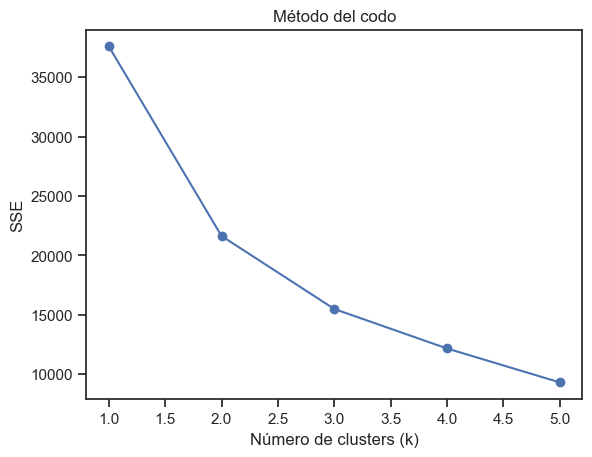

In [60]:
#2016
scaler = StandardScaler()
data_scaled_2016 = scaler.fit_transform(df2016)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2016)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\clust

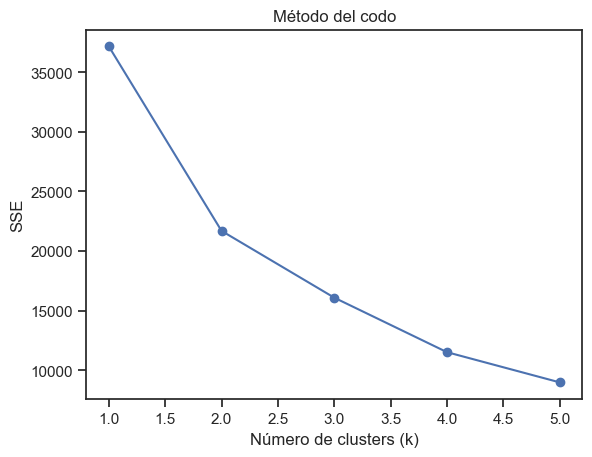

In [61]:
#2018
scaler = StandardScaler()
data_scaled_2018 = scaler.fit_transform(df2018)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2018)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\clust

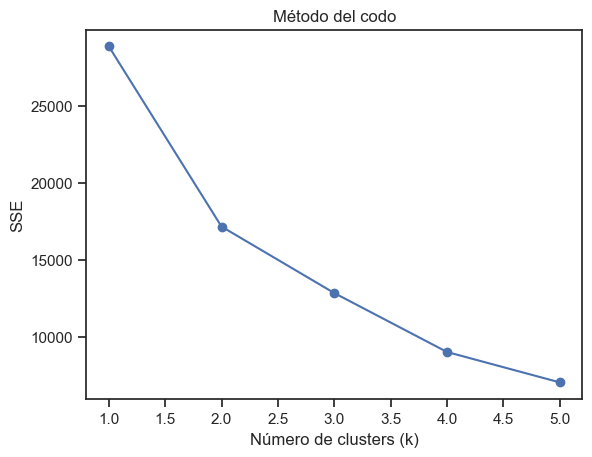

In [62]:
#2020
scaler = StandardScaler()
data_scaled_2020 = scaler.fit_transform(df2020)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2020)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carpa\anaconda3\lib\site-packages\sklearn\clust

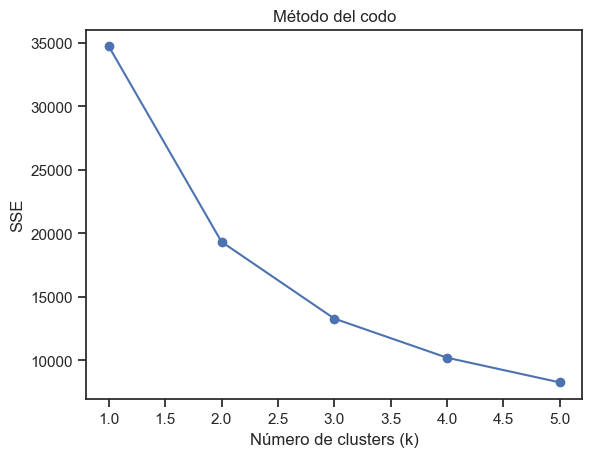

In [63]:
#2022
scaler = StandardScaler()
data_scaled_2022 = scaler.fit_transform(df2022)
inertia = []
k_values = list(range(1, 6))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_2022)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

### K-Means 
Ahora emplearemos K-Means para la clusterización de nuestros datos. Una vez se hayan dividido nuestros datos por clústeres, no sabremos qué clúster pertenece a qué clase social, sim embargo, para ello emplearemos la media de la varible RENTA_TOTAL. De esta manera, el clúster que mayor media de RENTA_TOTAL tenga, será el clúster de un nivel social mayor, y así sucesivamente.

Repetiremos el proceso para las 4 bases de datos.

#### 2016

In [77]:
k = 3 
kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300, random_state=42)
kmeans_clusters_2016 = kmeans.fit_predict(data_scaled_2016)
df2016_clustered = df2016.copy()
df2016_clustered['cluster'] = kmeans_clusters_2016
#Contamos el número de casos en cada nive de clase social
df2016_clustered['cluster'].value_counts()

2    11474
1     6696
0      626
Name: cluster, dtype: int64

In [78]:
#Determinamos qué cluster representa cada clase social observando la media de INGRESO
mean_income = df2016_clustered.groupby('cluster')['RENTA_TOTAL'].mean()
print(mean_income)

cluster
0    55925.892971
1    21255.978495
2     5366.340858
Name: RENTA_TOTAL, dtype: float64


In [79]:
df2016_clustered['cluster'] = df2016_clustered['cluster'].replace({0:1, 1:2, 2:3})
df2016_clustered['cluster'].value_counts()

3    11474
2     6696
1      626
Name: cluster, dtype: int64

In [80]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled_2016, kmeans_clusters_2016)
# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data_scaled_2016, kmeans_clusters_2016)
# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(data_scaled_2016, kmeans_clusters_2016)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Índice de Davies-Bouldin:", db_score)

Silhouette Score: 0.4946905509377609
Calinski-Harabasz Score: 13409.543386066189
Índice de Davies-Bouldin: 0.8032948588250121


#### 2018

In [67]:
k = 3 
kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300, random_state=42)
kmeans_clusters_2018 = kmeans.fit_predict(data_scaled_2018)
df2018_clustered = df2018.copy()
df2018_clustered['cluster'] = kmeans_clusters_2018
#Contamos el número de casos en cada nive de clase social
df2018_clustered['cluster'].value_counts()

1    10822
0     6791
2      973
Name: cluster, dtype: int64

In [68]:
#Determinamos qué cluster representa cada clase social observando la media de INGRESO
mean_income = df2018_clustered.groupby('cluster')['RENTA_TOTAL'].mean()
print(mean_income)

cluster
0    34401.669121
1     9530.263168
2    80384.456321
Name: RENTA_TOTAL, dtype: float64


In [69]:
df2018_clustered['cluster'] = df2018_clustered['cluster'].replace({0:2, 1:3, 2:1})
df2018_clustered['cluster'].value_counts()

3    10822
2     6791
1      973
Name: cluster, dtype: int64

In [81]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled_2018, kmeans_clusters_2018)
# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data_scaled_2018, kmeans_clusters_2018)
# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(data_scaled_2018, kmeans_clusters_2018)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Índice de Davies-Bouldin:", db_score)

Silhouette Score: 0.47074813757099804
Calinski-Harabasz Score: 12146.059008040424
Índice de Davies-Bouldin: 0.8416025628375722


#### 2020

In [70]:
k = 3 
kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300, random_state=42)
kmeans_clusters_2020 = kmeans.fit_predict(data_scaled_2020)
df2020_clustered = df2020.copy()
df2020_clustered['cluster'] = kmeans_clusters_2020
#Contamos el número de casos en cada nive de clase social
df2020_clustered['cluster'].value_counts()

2    8194
0    5506
1     742
Name: cluster, dtype: int64

In [71]:
#Determinamos qué cluster representa cada clase social observando la media de INGRESO
mean_income = df2020_clustered.groupby('cluster')['RENTA_TOTAL'].mean()
print(mean_income)

cluster
0     70537.431711
1    159966.780323
2     19810.653649
Name: RENTA_TOTAL, dtype: float64


In [72]:
df2020_clustered['cluster'] = df2020_clustered['cluster'].replace({0:2, 1:1, 2:3})
df2020_clustered['cluster'].value_counts()

3    8194
2    5506
1     742
Name: cluster, dtype: int64

In [83]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled_2020, kmeans_clusters_2020)
# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data_scaled_2020, kmeans_clusters_2020)
# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(data_scaled_2020, kmeans_clusters_2020)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Índice de Davies-Bouldin:", db_score)

Silhouette Score: 0.4607048705174124
Calinski-Harabasz Score: 9008.981484476848
Índice de Davies-Bouldin: 0.8534420827655812


#### 2022

In [73]:
k = 3 
kmeans = KMeans(init="random",n_clusters=k,n_init=10,max_iter=300, random_state=42)
kmeans_clusters_2022 = kmeans.fit_predict(data_scaled_2022)
df2022_clustered = df2022.copy()
df2022_clustered['cluster'] = kmeans_clusters_2022
#Contamos el número de casos en cada nive de clase social
df2022_clustered['cluster'].value_counts()

0    9898
1    6645
2     824
Name: cluster, dtype: int64

In [74]:
#Determinamos qué cluster representa cada clase social observando la media de INGRESO
mean_income = df2022_clustered.groupby('cluster')['RENTA_TOTAL'].mean()
print(mean_income)

cluster
0     34934.046070
1    136117.570805
2    330083.855583
Name: RENTA_TOTAL, dtype: float64


In [75]:
df2022_clustered['cluster'] = df2022_clustered['cluster'].replace({0:3, 1:2, 2:1})
df2022_clustered['cluster'].value_counts()

3    9898
2    6645
1     824
Name: cluster, dtype: int64

In [84]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled_2022, kmeans_clusters_2022)
# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(data_scaled_2022, kmeans_clusters_2022)
# Calcular el índice de Davies-Bouldin
db_score = davies_bouldin_score(data_scaled_2022, kmeans_clusters_2022)
print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Índice de Davies-Bouldin:", db_score)

Silhouette Score: 0.46892277903723595
Calinski-Harabasz Score: 14006.817202668492
Índice de Davies-Bouldin: 0.8271717297557135


Ahora unimos todos los resultados en un mismo dataframe. Tendremos el número de personas de cada clase social por año en Argentina.

In [85]:
argentina = {
    "Anio": [2016, 2018, 2020, 2022],
    "Clase_Social_Alta": [626, 973, 742, 824],
    "Clase_Social_Media": [6696, 10822, 5506, 6645],
    "Clase_Social_Baja": [11474, 6791, 8194, 9898]
}
argentina = pd.DataFrame(argentina)
argentina

Anio  Clase_Social_Alta  Clase_Social_Media  Clase_Social_Baja
0  2016                626                6696              11474
1  2018                973               10822               6791
2  2020                742                5506               8194
3  2022                824                6645               9898

In [86]:
#Los exportamos a un CSV
argentina.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/argentina.csv', index=False)

Ahora en un nuevo dataframe, pondremos las víctimas de violencia de género por año.

In [87]:
import pandas as pd

datos_vio_gen = {'Anio': [2016, 2018, 2020, 2022],
        'Victimas_Violencia_Genero': [3787, 4277, 5796, 7069]}
vic_violencia = pd.DataFrame(datos_vio_gen)
vic_violencia

Anio  Victimas_Violencia_Genero
0  2016                       3787
1  2018                       4277
2  2020                       5796
3  2022                       7069

Ahora unimos los dos dataframes anteriores en uno solo. De este modo, tendremos para cada año, el número de personas perteneciente a cada clase social y las víctimas de violencia de género en EE. UU.

In [88]:
datos_final = pd.merge(argentina, vic_violencia, on="Anio")
datos_final

Anio  Clase_Social_Alta  Clase_Social_Media  Clase_Social_Baja  \
0  2016                626                6696              11474   
1  2018                973               10822               6791   
2  2020                742                5506               8194   
3  2022                824                6645               9898   

   Victimas_Violencia_Genero  
0                       3787  
1                       4277  
2                       5796  
3                       7069

In [89]:
#Guardamos este df en un csv
datos_final.to_csv('C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_final_argentina.csv', index=False)